# ReadMe: Présentation des documents/fichiers fournis 


Le dossier fourni comprend plusieurs dossiers et fichiers afin de réalisé la preuve de concept de l'article: **"Liu et al. - 2022 - Sub-messages extraction for industrial control protocol"**



## Dossier 'documents'

 - Contient l'article sur lequel est réalisé la preuve de concept Liu et al. - 2022 - Sub-messages extraction for industrial control pro.
 
 - Contient les articles utilisés afin d'implémenter les différents algorithmes évoqués dans l'article: "Liu et al. - 2022 - Sub-messages extraction for industrial control protocol".
 
 - Contient une présentation powerpoint de la preuve de concept réalisée.



## Dossier 'Data_found'
- **all_s7_data_from_ics_security_tools:**
  - Contiennent tous les messages du protocole de communication S7 disponibles de manière open source, référencés dans l'article.
- **all_s7_data_from_ics_security_tools et all_s7_data_from_s7_pcaps:**
  - Contiennent des messages du protocole de communication S7 disponibles de manière open source, référencés dans l'article.

- **df_packets_2_repositories_300000_messages et df_packets_2_repositories_50_messages:**
  - Représentent les DataFrames générés par le script "pcap_files_to_df.py", récupérant respectivement l'intégralité et une portion des messages extraits des paquets des dossiers "all_s7_data_from_ics_security_tools" et "all_s7_data_from_s7_pcaps".

- **s7comm_downloading_block_db1.pcap:**
  - Ce fichier, présent dans les données open source trouvées, correspond au paquet utilisé par les auteurs de l'article.

- **data_paper_PRE_image_reformed.txt:**
  - Fichier texte regroupant les données utilisées dans l'article.




## Fichiers Python (.py) et Jupyter (.ipynb) dans le dossier 'Code'

- **POC_extraction_sous_message_notebook.ipynb:**
    - Notebook

- **pcap_files_to_df.py:**
   - Permet de récupérer plus de 300 000 messages extraits de fichiers pcap/pcng présents dans différents répertoires.

- **Sub_messages_extraction_algorithm.py:**
   - Réalise l'extraction de sous-messages pour un message donné. Ce programme est organisé uniquement à l'aide de fonctions.
   
- **Sub_messages_extraction_algorithm_boucle.py:**
   - Réalise l'extraction de sous-messages pour tous les message présent dans l'article. Ce programme est organisé uniquement à l'aide de fonctions.


- **Script_PRE_class.py:**
   - Contient deux classes (All_messages et Message_mi) dont les méthodes correspondent aux fonctions utilisées dans "Sub_messages_extraction_algorithm.py". Ce script, déroulé en programmation orientée objet, permet de récupérer tous les sous-messages de manière plus organisé.



## Dossier 'Func'
 - Contient toutes les fonctions utilisées dans le script **'Sub_messages_extraction_algorithm.py'** et **'Sub_messages_extraction_algorithm_boucle.py'**


## Dossier 'images'
 - Contient les images du jupyter notebook

# 0. Sommaire

    ## I. Introduction et Problématique

    ## II. Aspects Essentiels de l'Ingénierie Inverse des Protocoles (PRE)

    ## III. Method SEIP: Inférence du Format de Protocole
        ### III.1 Collecte et Prétraitement des Données
        ### III.1.2 Inférence de l'En-tête du Protocole
        ### III.3 Séparation de la Charge Utile Longue
        ### III.4 Extraction des Sous-messages
        ### III.5 Inférence du Format des Sous-messages - Segmentation basé sur le template
        ### III.6  Algorithme complet - SEIP   

    ## IV. Résultats - Crtière d'évaluation

    ## V. Réecriture du code en POO
    
    ## VI. Conclusion










---

# I. Introduction et Problématique

L'Internet Industriel des Objets (IIoT) révolutionne la manière dont les dispositifs et les processus industriels interagissent, en favorisant une approche de fabrication intelligente. Cette connectivité étendue englobe divers dispositifs, qui peuvent utiliser une variété de protocoles de communication, qu'ils soient standards ou propriétaires. L'Ingénierie Inverse des Protocoles (PRE) se révèle être une stratégie cruciale pour décoder les formats de protocoles inconnus, en analysant les traces de trafic. Cette approche trouve une pertinence particulière dans la réintégration d'équipements plus anciens dans le cadre de l'IIoT.

Bien que les travaux existants aient largement traité des protocoles Internet conventionnels utilisant des messages textuels, l'application de la PRE aux protocoles de contrôle industriel, spécialement adaptée à l'IIoT, demeure un défi significatif. 
En effet, dans un contexte industriel, **les interactions entre objets se matérialisent à travers des messages étendus, dont la compréhension dépend intrinsèquement de la connaissance du format du protocole de communication sous-jacent**.

Ainsi, le défi majeur réside dans **l'extraction de la segmentation des sous-messages à partir d'un seul message étendu**. Ces sous-messages traduisent des commandes réalisées (ex: Setup, Start, Stop...). Les noms et les actions des commandes différent d'un protocole à l'autre. Ces sous-messages extraits sont structurés de manière similaire au message initial, compliquant la détermination de leur position et de leur signification. L'algorithme proposé, basé sur l'itération de modèles (où le modèle initial correspond au premier sous message du message étendu), offre une solution en déterminant le format des sous-messages, chacun portant une signification propre. Cette approche s'inscrit dans le cadre de l'Ingénierie Inverse des Protocoles, promettant une voie clé pour la détermination finale du format du protocole de communication.


Ainsi, sachant que  Le présent travail représente ainsi une étape intermédiaire dans le processus global d'inférence du format du protocole, sans recourir à une connaissance préalable, ouvrant ainsi la voie à des améliorations significatives de la précision globale de cette démarche.



# II. Aspects Essentiels de l'Ingénierie Inverse des Protocoles (PRE)


## Objectif  

En raison des divers avantages propres à chaque entreprise dans certains produits, les utilisateurs optent souvent pour des produits de différentes entreprises pour établir un système IIoT. Cependant, cela engendre des problèmes d'interopérabilité des produits et de défense de sécurité commune. De plus, la modernisation des équipements anciens s'avère être un processus lent et coûteux, entravé par le fait que le protocole de la couche d'application du nouvel équipement est fréquemment inconnu, rendant ainsi impossible la connexion de ce dernier au réseau existant. On comprend ainsi le rôle crucial du PRE.

## Catégories
La PRE est principalement divisée en deux catégories: la trace d'exécution et la trace de trafic. 
Pour les protocoles de contrôle industriel (ICP), l'analyse de la trace d'exécution est complexe car elle nécessite l'accès à la mémoire et au programme exécutable du logiciel correspondant de l'appareil. 
En revanche, l'analyse de la *trace de trafic est basée sur les messages de protocole en communication*, ce qui est facile à obtenir. 







# III. Method SEIP: Inférence du Format de Protocole

La méthodologie SEIP (Sub-messages Extraction for Industrial control Protocol) est introduite comme une solution novatrice pour inférer le format complet d'un protocole. Cette approche représente une première tentative pour analyser la charge utile de messages longs issus de protocoles de contrôle industriel.
La méthode est illustré dans la figure ci dessous, en cinq étapes distinctes. 

<div>
    <img src="images\SEIP.png" style="width:500px; height:400px;"/>
    <p>Figure 1 : Processus SEIP </p>
</div>


Ces cinqs étapes seront représentées à travers les cinqs section suivante.

## III.1 Collecte et Prétraitement des Données

Comme évoqué précédemment dans l'introduction et dans le contexte de nos objectifs liés à l'évaluation de l'algorithme, les données que nous utilisons sont principalement issues de **messages échangés entre différents appareils industriels via des protocoles de communication**. Cette section se concentrera sur l'examen des hypothèses associées aux données de communication et explorera la méthodologie de collecte de ces données. Nous aborderons également la configuration spécifique des messages pour un protocole de communication donné, en l'occurrence, le protocole TCP.


### III.1.1 Hypothèses sur les données
Les messages chiffrés ou compressés sont difficiles à décoder, ils ne sont donc pas pris en compte dans cet article.
Cet article se concentre sur l'inférence du format du protocole basée sur la trace de trafic **non chiffrée** et **non compressée**, sans aucune modification du protocole lui-même.


### III.1.2 Les protocoles de communications 

L'algorithme est principalement testé sur les automates Siemens S7. Ces derniers sont basées sur les protocoles TPKT ("Transport Protocol Data Unit") et COTP (Connection-Oriented Transport Protocol). Ses commandes de protocole peuvent être divisées en commandes d'opération, telles que la configuration, le démarrage et l'arrêt, ainsi que des données...(cf Figure 1).
Les automates Siemens S7 utilise en faite les protocoles TPKT, COTP, et S7COMM. Ces derniers sont utilisés en tandem pour créer une pile de protocoles. TCP assure la fiabilité sous-jacente, TPKT encapsule COTP, qui à son tour encapsule S7COMM. Cela permet une communication robuste et orientée connexion entre les systèmes de contrôle et les automates S7. Chaque couche de protocole a son rôle spécifique dans le processus de communication.


<div>
    <img src="images\encapsule.png";/>
    <p>Figure 0: Encapsulation du protocol S7</p>
</div>
                                      
On observe une approche similaire d'encapsulation dans d'autres protocoles industriels tels que FINS d'Omron et MELSEC de Mitsubishi.                                          

### III.1.3 Collecte des données

Les données utilisées dans l'article semblent provenir de données open source récupérées via GitHub. Ces données sont principalement des captures de paquets (fichiers PCAP lisibles avec le logiciel Wireshark) entre différents appareils industriels. Les liens associés sont les suivants :

- Source 1 - https://github.com/automayt/ICS-pcap.
Il s'agit d'une compilation de fichiers PCAP (ou de notes complémentaires lorsque des PCAP sont encore nécessaires) pour les utilitaires et protocoles ICS/SCADA.

- Source 2 - https://github.com/gymgit/s7-pcaps.
Il s'agit de fichiers PCAP que créés à des fins publiques. Le trafic est enregistré entre diverses applications clientes (STEP7 Manager 5.5, TIA Portal v13, client personnalisé avec Snap7, WinCC Advanced) et des automates programmables industriels (API) des séries S7-300 et S7-400. Les adresses IP sont randomisées et réécrites avec une réécriture TCP, donc veuillez ne pas essayer de rechercher ces dispositifs sur Internet (ils ne sont de toute façon pas sur des réseaux publics).

- Source 3 - https://github.com/ITI/ICS-Security-Tools/
Il s'agit de fichiers PCAP/PCAPNG récupérés pour plusieurs protocol de communications dont le protocoles S7.
Les données sont à priori récupérés à travers ces sources et sont représentés dans la figure suivante:


On présente l'architecture des paquets à travers le paquet situé au chemin "DataFound\s7comm_downloading_block_db1.pcap". Ce paquet est issu de la "source 1" et représente une partie des messages utilisés dans l'article, visible en figure 3. 
Le logiciel Wireshark a été utilisé pour ouvrir le fichier.


<div>
    <img src="images\paquet.png"/>
    <p>Figure 2.1: s7comm_downloading_block_db1.pcap - paquet utilisé pour l'obtention des données de l'article présent en figure 3 </p>
</div>

On retrouve l'organisation d'un tableau. **Les messages étendus que nous cherchons à analyser résident dans la colonne "Info"**. 
Dans cette colonne, on obtient une indication sur les commandes associées aux sous-messages d'un message. En effet, les commandes les plus fréquemment utilisées avec le protocole S7 sont les suivantes :
**Job
Ack
Req -
Rsp**








Étant donné que cette étape, qui est essentielle **n'est pas détaillée dans l'article**, nous présentons ici comment les sous-messages sont récupérés à l'aide de Wireshark. 
<div>
    <img src="images\m1schema.png" style="width:500px; height:400px;"/>
    <p>Figure 2: message No = 5 du fichier s7comm_downloading_block_db1.pcap </p>
</div>

**Ce message présente une structure de sous-messages.** La commande du message associée est **Req**. En effet, on relève CR (Connect Request) dans la colonne Info du message numéro 5.

Il correspond à un échange d'informations visant à établir une connexion, probablement entre deux automates.
Le premier et le deuxième sous-message, indiqués en bleu et mauve, représentent tous deux une phase d'initialisation au cours de laquelle les deux parties échangent des informations pour établir une connexion, y compris les adresses TSAP (utilisant la commande **tsap**). Pour le troisième sous-message, on retrouve le même raisonnement avec **tpdu**, la commande est employée pour encapsuler les données à transporter, incluant des informations de contrôle essentielles pour la gestion de la connexion.


Ainsi, pour récupérer les données de la figure 3 (données utilisées dans l'article), une étape importante a été de parser les fichiers PCAP pour qu'ils soient lisibles par Python. Afin d'obtenir des données similaires à la figure 3, seules les sources 1 et 2 sont d'intérêt, regroupant les paquets associés au protocole de communication utilisant des automates S7. Le code est présenté dans les cellules suivantes.

<div>
    <img src="images\Data_paper.png" style="width:800px; height:400px;"/>
    <p>Figure 3: Données de l'article - Exemple de messages issus du protocole de communication S7 </p>
</div>

Ce qui est important à savoir, c'est que les messages présents dans la colonne TPKT + COTP + S7COMM sont récupérés à l'aide du module TCP de la bibliothèque Scapy. En fait, TCP encapsule TPKT, COTP, et aussi S7COMM (Figure 0), l'argument [TCP] suffit à récupérer le message d'intérêt.
De plus, on est aussi capable de récupérer les messages d'intérêt en connaissant le port de communication sur lequel est branché l'automate. Généralement, c'est le port numéro 102 qui est associé aux protocoles de communication S7.

Les messages présentant une structure de sous-messages sont des **segments d'octets qui sont surlignés sur la figure 3**. On observe que certains messages ne présentent pas de structure de sous-messages (m3, par exemple). Il est également notable que plusieurs autres messages présentent des structures de sous-messages avec des segments de tailles différentes (m9, par exemple). D'autres messages peuvent contenir seulement un seul sous-message (m14, par exemple). **L'objectif de la méthode SEIP est de trouver, pour chaque message, ces sous-messages**.


La partie utile, qui contient donc les messages étendus dans la colonne "Info" du paquet, sera appelée "payload". Ainsi, dans les DataFrames suivants, la colonne d'intérêt contenant ces messages s'appellera **"tcp_payload"**.

En se basant sur le schéma  suivant, on examine la distribution des octets au sein de cette charge utile (et donc d'un message). 

<div>
    <img src="images\tcp0.png" style="width:300px; height:200px;"/>
    <p>Figure 4: distribution des octets au sein de cette charge utile (tcp_payload) </p>
</div>
 

- **HLEN (Header Length):**
  - Longueur de l'en-tête TCP en mots de 32 bits.

- **Acknowledged Number (Numéro d'accusé de réception) :**
  - Numéro de séquence attendu pour les prochaines données.

- **Sequence Number (Numéro de séquence) :**
  - Numéro de séquence du premier octet des données dans le segment TCP.

- **Window Size (Taille de la fenêtre) :**
  - Spécifie la taille de la fenêtre de réception, indiquant la quantité d'octets que le récepteur est prêt à accepter.


In [1]:
#----------------Code récupération des messages associés au protocole de communication S7------------------

from Func.PRE_fonctions import tcp_messages_from_pcap_to_df
"""   
    Cette fonction prend en entrée le nom d'un fichier PCAPNG et retourne un DataFrame Pandas contenant des informations
    sur les messages TCP contenus dans le fichier.

    Paramètres :
    - `filename` (str): Le chemin du fichier PCAPNG.

    Sortie :
    - `df` (DataFrame Pandas): Un DataFrame contenant les informations extraites du fichier PCAPNG, telles que le temps,
      les adresses source et destination, le payload, le payload TCP, et le payload TCP sur le port 102.
"""

from Func.PRE_fonctions import df_from_pcap_to_df_for_all_repository
"""
    Cette fonction prend en entrée une liste de répertoires, parcourt les fichiers PCAP ou PCAPNG dans chaque répertoire,
    et retourne un DataFrame Pandas consolidé avec les informations de tous les fichiers.

    Paramètres :
    - `repertoire_list` (list): Une liste de répertoires.

    Sortie :
    - `liste_dataframes` (list): Une liste de DataFrames, un pour chaque fichier dans chaque répertoire.
    - `df` (DataFrame Pandas): Un DataFrame consolidé avec les informations de tous les fichiers.
"""
 

'\n    Cette fonction prend en entrée une liste de répertoires, parcourt les fichiers PCAP ou PCAPNG dans chaque répertoire,\n    et retourne un DataFrame Pandas consolidé avec les informations de tous les fichiers.\n\n    Paramètres :\n    - `repertoire_list` (list): Une liste de répertoires.\n\n    Sortie :\n    - `liste_dataframes` (list): Une liste de DataFrames, un pour chaque fichier dans chaque répertoire.\n    - `df` (DataFrame Pandas): Un DataFrame consolidé avec les informations de tous les fichiers.\n'

In [2]:
# ----------------Script de récupération des données open source - pcap_files_to_df.py ------------------

# repertoire1= "Data_found\\all_s7_data_from_ics_security_tools"
# repertoire2= "Data_found\\all_s7_data_from_s7_pcaps"

# #Création du dataframe concaténé df
# repertoire_list = [repertoire1,repertoire2]
# l_df,df = df_from_pcap_to_df_for_all_repository(repertoire_list)


# # Enregistrer le DataFrame au format CSV
# print("\nEnregistrement du dataframe au format CSV...")
# df.to_csv('df_packets.csv',sep=';', index=False)


Afin de ne pas avoir à lancer le code dans le bloc précédent, on donne directement le DataFrame créé en sortie; ce dernier est présent dans le chemin "DataFound\df_packets_2_repositories_300000_messages.csv". Le code précédent permet de récupérer plus de 300 000 messages extraits ! Un autre DataFrame "Data_Found\df_packets_2_repositories_50_messages.csv" est donné et regroupe 50 messages.  
Il est également possible de récupérer ces 300 000 messages extraits en exécutant le script "pcap_files_to_df.py".

La fonction pour lire le DataFrame "df_packets_2_repositories_300000_messages.csv" est présente dans la cellule suivante.

**Remarque (1): Il n'est pas nécessaire de récupérer le fichier df_packets_2_repositories_300000_messages.csv. Vous pouvez procéder à l'exécution de toutes les cellules suivantes du notebook sans ce fichier.**

**Remarque (2): Le fichier df_packets_2_repositories_300000_messages.csv n'est pas fourni ici car il dépasse la taille maximale autorisée sur GitHub, qui est inférieur 400 Mo (taille du fichier). Afin d'obtenir ce fichier, vous pourrez exécuter le script "pcap_files_to_df.py". Pour les tests suivant, vous pouvez utiliser le fichier "df_packets_2_repositories_50_messages.csv", qui respecte la limite de taille imposée par GitHub.**  



In [3]:
from Func.PRE_fonctions import data_open_source_to_df
"""
        Convertit les données d'un fichier CSV en un DataFrame formaté.
    
        Entrée:
        - filename_df_data_open_source (str): Le chemin du fichier CSV.
    
        Sortie:
        - payload_df_formate (DataFrame): DataFrame Pandas contenant la colonne 'tcp_payload' formatée.
"""

"\n        Convertit les données d'un fichier CSV en un DataFrame formaté.\n    \n        Entrée:\n        - filename_df_data_open_source (str): Le chemin du fichier CSV.\n    \n        Sortie:\n        - payload_df_formate (DataFrame): DataFrame Pandas contenant la colonne 'tcp_payload' formatée.\n"

In [4]:
#---------------test de la fonction de lecture ---------------------------
formated_messages_for__messages = data_open_source_to_df('Data_Found\df_packets_2_repositories_50_messages.csv')
#print(formated_messages_for__messages)

En analysant la Figure 3, il est apparent que tous les messages semblent être issus d'un seul paquet, comme indiqué par l'évolution logique du temps dans la colonne "time". Cependant, le paquet de la Figure 2, bien qu'il contienne une partie des messages présentés dans l'article (Figure 3), ne semble pas inclure l'ensemble des messages de l'article. Après une analyse et un tri minutieux de plus de 300 000 messages de communication S7 disponibles en open source, il est évident que certains messages présentés dans l'article (Figure 3) ont été introduits manuellement. En réalité, seuls les messages m1, m3, m4 et m5 sont retrouvables dans le paquet présenté précédemment en Figure 2.

Pour remédier à cette situation, j'ai pris l'initiative de créer un fichier texte reformulant le DataFrame de la Figure 3. Cette étape s'avère cruciale, car les messages utilisés dans l'article joueront un rôle déterminant dans la validation de chaque étape de la méthode SEIP.

In [5]:
from Func.PRE_fonctions import data_from_paper_txt_to_df
"""
     Convertit les données à partir d'un fichier texte en un DataFrame.
     
     Entrée:
     - filename (str): Le chemin du fichier texte.
     
     Sortie:
     - df (DataFrame): Un DataFrame Pandas contenant les colonnes suivantes :
         - No: Numéro du message.
         - time: Horodatage du message.
         - src_adresses: Adresse IP source.
         - dst_adresses: Adresse IP de destination.
         - tcp_payload: Représentation hexadécimale de la charge utile TCP.
         - Commands: Commandes du message.
""" 

from  Func.PRE_fonctions import split_message
"""
       Divise les messages hexadécimaux d'une colonne 'tcp_payload' en listes d'octets.
    
       Entrée:
       - df (DataFrame): Le DataFrame contenant la colonne 'tcp_payload' à diviser.
    
       Sortie:
       - messages_df (list): Liste des messages hexadécimaux d'origine.
       - messages (list): Liste des messages divisés en listes d'octets.
"""


"\n       Divise les messages hexadécimaux d'une colonne 'tcp_payload' en listes d'octets.\n    \n       Entrée:\n       - df (DataFrame): Le DataFrame contenant la colonne 'tcp_payload' à diviser.\n    \n       Sortie:\n       - messages_df (list): Liste des messages hexadécimaux d'origine.\n       - messages (list): Liste des messages divisés en listes d'octets.\n"

In [6]:
# ----------------Script de récupération des données de l'article ------------------

filename = 'Data_found\\data_paper_PRE_image_reformed.txt'
df = data_from_paper_txt_to_df(filename)  #df représentant les données en Figure 3
messages_hex, messages_hex_split = split_message(df)

# print(df,'\n')
# print(messages_hex,'\n')
# print(messages_hex_split,'\n')

## III.1.2 Inférence de l'En-tête du Protocole


L'un des premiers objectifs de la méthode SEIP est de séparer l'entête du protocole des données, également appelées charge utile (payload en anglais) (cf. Figure 4). L'article mentionne que, en parcourant tous les messages, l'entropie de l'entête reste relativement faible par rapport à celle de la charge utile. Dans un premier temps, l'entropie est utilisée pour séparer l'entête de la charge utile.

Les fonctions associées à cette démarche sont les suivantes :
1. **Fonction d'entropie** (Entropy function) :
   $$ H(b_x) = \sum_i -p_i \log_2 p_i $$
où $p_i$ est la probabilité de la valeur 𝑖 à la même position d'octet 𝑏𝑥 parmi différents messages.    

2. **Pourcentage de messages à la position \($b_x$\)** (Percentage of messages at position \(b_x\)) :
   $$ EP(b_x) = \frac{\text{Messages avec position } b_x}{\text{Total de messages}} $$

3. **Entropie modifiée pour tous les messages** (Modified entropy for all messages) :  

   $$ Hm(b_x) = \frac{H(b_x)}{EP(b_x)} $$
   
4. **Entropie modifiée pour un message mi** (Modified entropy for mi) :  

   $$ H_{mi}(b_x) = \frac{H(mi)}{H(b_x) \cdot EP(b_x)} $$

**Remarque:** b_x correspond à un octet dans un message. Par exemple dans le message m1: [03 00 00 16 11 e0 00 00 00 07 00 c1 02 02 00 c2 02 02 02 c0 01 0a], $b_0$ = 03.
Aussi H($b_0$) = 0, car pour tous les messages de la figure 3 le première octet est 03.

Ci-dessous sont présentés les résultats obtenus par l'article pour déterminer l'emplacement permettant de passer de l'entête du protocole à la charge utile. La séparation est indiquée en rouge. La Figure A représente l'entropie modifiée de tous les messages, où en moyenne, elle se situe à l'octet numéro 22. En ce qui concerne la Figure B, elle montre l'entropie pour un message particulier, le message numéro 9. La séparation se fait à l'octet numéro 33, correspondant à la position du premier sous-message. L'octet numéro 37 (séparation indiquée en jaune) représente la position du premier octet du second sous-message.

<div>
    <img src="images\res1.png" style="width:600px; height:200px;"/>
    <p>Figure 5: Entropie modifiée pour tous les messages mais aussi pour un seul message (m9) </p>
</div>
 


$\color{blue}{\text{Implémentation:}}$



In [7]:
from  Func.PRE_fonctions import calculer_position_moyenne_premier_sous_message

"""
    Calcule la position moyenne du premier octet d'un sous-message pour tous les messages en fonction de l'entropie modifiée.
    
    Paramètres :
    - messages (List[str]) : Liste de messages (chaque message est représenté sous forme de chaîne de caractères).
    
    Retourne :
    - sub_message_starting_position_total_message (int) : Position moyenne du premier octet d'un sous-message pour tous les messages.
    
    Remarques :
    - La position moyenne est déterminée en fonction de l'entropie modifiée.
    - La redline de la figure 3(a) est indiquée par la position moyenne du premier octet d'un sous-message.
    - La fonction utilise le seuil theta_H_for_total_messages (fixé à 0.8 par défaut) pour déterminer la position moyenne.
    
    Utilisation :
    calculer_position_moyenne_premier_sous_message(messages)
"""

from  Func.PRE_fonctions import calculer_position_premier_sous_message
"""
    Calcule la position du premier octet d'un sous-message dans un message spécifique en fonction de l'entropie modifiée.
    
    Paramètres :
    - No (int) : Numéro du message pour lequel la position doit être calculée.
    - messages_hex_split (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux, splités).
    - messages_hex (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux).
    
    Retourne :
    - first_sub_message_position_b1 (str) : Position du premier octet d'un sous-message, considérant que le premier bit est b1 (dans la notation "mX_bY").
    
    Remarques :
    - La position est déterminée en fonction de l'entropie modifiée.
    - La fonction affiche également un graphique (Figure 3.(b)) montrant les valeurs d'entropie modifiée pour chaque position.
    
    Utilisation :
    calculer_position_premier_sous_message(No, messages_hex_split, messages_hex)
"""


'\n    Calcule la position du premier octet d\'un sous-message dans un message spécifique en fonction de l\'entropie modifiée.\n    \n    Paramètres :\n    - No (int) : Numéro du message pour lequel la position doit être calculée.\n    - messages_hex_split (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux, splités).\n    - messages_hex (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux).\n    \n    Retourne :\n    - first_sub_message_position_b1 (str) : Position du premier octet d\'un sous-message, considérant que le premier bit est b1 (dans la notation "mX_bY").\n    \n    Remarques :\n    - La position est déterminée en fonction de l\'entropie modifiée.\n    - La fonction affiche également un graphique (Figure 3.(b)) montrant les valeurs d\'entropie modifiée pour chaque position.\n    \n    Utilisation :\n    calculer_position_premier_sous

34


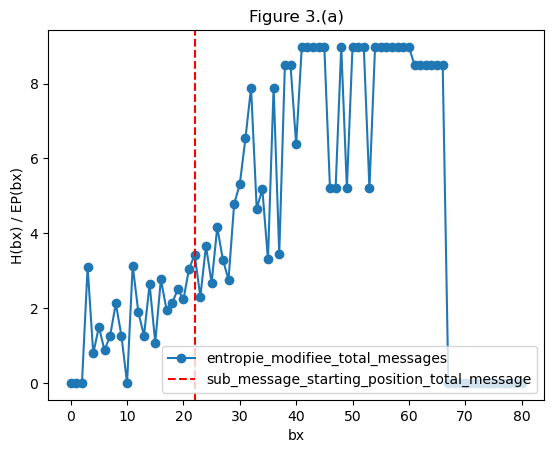

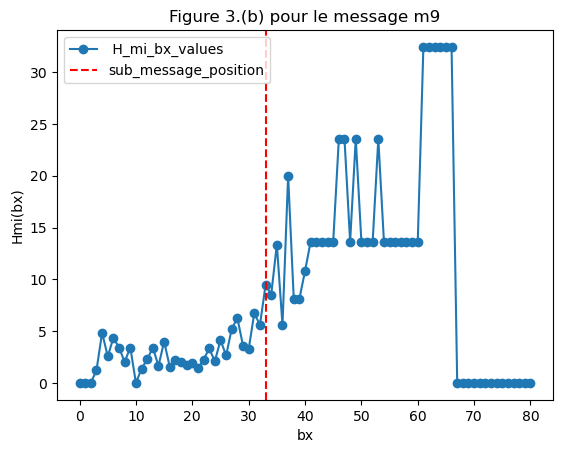

In [8]:
calculer_position_moyenne_premier_sous_message(messages_hex_split)


No = 9 #Numéro du message Figure 3 - choix allant de 1 à 17 -
first_sub_message_position_by_entropie = calculer_position_premier_sous_message(No, messages_hex_split, messages_hex)
print(first_sub_message_position_by_entropie)

Ce que l'article ne précise pas, c'est qu'afin d'obtenir des résultats comparables pour l'entropie modifiée de l'ensemble des messages, il est essentiel de prendre en compte la variation des longueurs des messages. En effet, on pourrait supposer que plus la valeur de $b_x$ est grande, plus l'entropie augmente. Cependant, cette augmentation de l'entropie n'est possible que si la position $b_x$ existe effectivement, ce qui n'est pas toujours le cas en raison des différentes longueurs des messages.

Pour le message m9 (No = 9), on observe des quelques différences dans les ordres de grandeur présentés dans la Figure 5. Le problème de reproduction de la première figure découle probablement de la fonction $ H(mi) $ dont l'expression exacte n'est pas clairement définie dans l'article. On pourrait supposer que $ H(mi)$ reprend l'expression donnée pour la fonction $H(bx)$, mais la probabilité $p_i$ à appliquer reste ambiguë. Ma supposition a été d'associer la probabilité $p_i$ à la fréquence d'apparition d'un octet à travers le message $mi$. Cependant, cette approche ne donne pas les résultats escomptés.  
En outre, on pourrait anticiper que $H(mi)$ ne dépende pas de $b_x$. Cependant, ce n'est pas le cas, comme le montre clairement la figure 5(b). $H(mi)$ ne semble pas être simplement un facteur multiplicatif de \(1 / (H(bx) \times EP(bx))\). Par conséquent, la reproduction de cette figure demeure difficile.  
Il n'empêche qu'il reste possible même avec cette ambiguité de retrouver la position de l'octet du premier sous message du message m9.  

L'article mentionne l'utilisation d'un seuil, noté $θ_h$, pour la séparation entre l'en-tête du protocole et la charge utile. La détermination de ce seuil est basée sur le calcul de la corrélation de Pearson entre les n-grams (sous-séquences contiguës de n éléments dans un message) d'un message et la longueur de ce même message. Une autre étape consiste à s'appuyer sur l' "Analyse fréquente des éléments", elle repose donc sur la fonction $EP(bx)$ et la valeur de $pi$ pour chaque $b_x$. Les détails précis de la méthode pour déterminer ce seuil ne sont pas clairement exposés dans l'article.J'ai donc fait des hypothèses:

- **Figure 5a:** Pour déterminer la position moyenne du premier sous-message, c'est-à-dire le seuil $θ_h$, j'ai fait l'hypothèse que $θ_h$ était fixé à 80%. Ainsi, la condition est la suivante : on parcourt les octets de tous les messages et on examine à partir de quel octet, 80% des messages ne contiennent pas l'octet $b_x$. On trouve $b_x$ égal à 22 .    

-  **Figure 5b:** Pour déterminer la position du premier sous-message d'un message donné, j'ai supposé, après analyse, que la condition pour le déterminer était lorsque la probabilité $p_i$, telle que définie lors de l'introduction de la fonction d'entropie, doit se situer entre 15 et 20%. Si aucune position ne satisfait cette condition, le message est considéré comme ne contenant pas de structure de sous-message. De plus, on considérera que si la position du premier sous-message est inférieure ou égale à $b_l$, le message sera considéré comme n'ayant pas de structure de sous-message. $b_l$ est le résultat trouvé de la corrélation de Pearson entre les n-grams d'un message et sa longueur. Par exemple, pour le message numéro un, le résultat de la fonction retourne 4. On sait alors que le 4ème octet désigne la taille du message. Il est donc impossible que le première octet appartenant au premier sous message du message soit iférieur strict $b_l$.




On renseigne ci dessous, dans la variable "first_sub_message_position_by_entropie_for_all_message_reel", la position du premier octet dans chaque message (de No =1 à No = 17, Figure3) détermine la présence du premier sous-message. Il est à noter que si la valeur est égale à 1 (valeur par défaut choisie), le message ne comporte pas de structure de sous-message.

In [9]:
#Remarque les valeurs sont indexés à partir de 1, par exemple pour le message 9, No =9, 
#le première octet appartenant au premier sous message du message sera l'octet b33 (on compte de b0....bx)
#Dans la variable first_sub_message_position_by_entropie_for_all_message_reel, on compte de b1.....bx, ce choix à été effectué car plus pratique pour la suite
#Ainsi pour le message 9, first_sub_message_position_by_entropie_for_all_message_reel = 34
first_sub_message_position_by_entropie_for_all_message_reel = [12, 12, 1, 1 ,1, 1, 1, 34, 34, 12, 12, 20, 22, 20, 22]


Comme explicité dans la section 3.2 de l'article, la récupération du premier octet associé à un sous-message dans un message peut engendrer des erreurs de décalage. Néanmoins, il est souligné que ce décalage ne conduira pas nécessairement à des résultats incorrects. Il est important de noter qu'il existe des cas spécifiques, tels que pour No = 8 (m8), où la fonction produit 27 au lieu de 34. Il est donc envisager de recalculer la position du premier octet, qui définit le premier sous-message d'un message, d'une manière différente, surtout pour les messages plus longs.

## III.3 Séparation de la Charge Utile Longue

L'idée consiste à effectuer **l'auto-corrélation de la séquence d'octets composant un message**. Cette opération d'autocorrélation est pertinente pour les messages "long" dont la longueur est significativement plus grande que la moyenne des messages et que cette différence est suffisamment grande par rapport à la variance.  
On souhaite déterminer la position du premier octet du premier sous-message du message, noté \( $b_x$ \), ainsi que la position du dernier octet du dernier sous-message, noté \( $b_y$ \). Ces positions seraient récupérables en considérant uniquement les valeurs supérieures à 99% de la valeur maximale de la fonction d'auto-corrélation. Ensuite, on retiendrait les valeurs de \( $b_x$ \) et \( $b_y$ \) de manière à maximiser la différence \( $b_y - b_x$ \).



Dans un premier temps, il est suggéré de représenter graphiquement la fonction d'autocorrélation en fonction de $b_x$ et $b_y$. Il est important de noter que $b_x$ et $b_y$ peuvent prendre n'importe quelle valeur dans la séquence d'octets d'un message.

**L'indexation de la matrice d'autocorrélation n'est pas explicitement définie**. Ainsi, il est nécessaire de mener une étude pour comprendre comment les données sont réparties dans cette matrice. Cela pourrait impliquer l'examen de la relation entre différentes positions $b_x$ et $b_y$ dans la séquence d'octets pour évaluer les corrélations possibles.

<div>
    <img src="images\ACF m9.png" style="width:400px; height:300px;"/>
    <p>Figure 6: La carte thermique de la fonction d'autocorrélation (ACF) du message étendu m9.  </p>
</div>

**Remarque:** Le message m9 initialement composé de 81 octets a été étendu à 91 octets. Les 10 octets ajoutés sont aléatoires L'objectif est de démontrer que la position de $b_x$ et $b_y$ peut être déterminée même si le dernier sous-message ne termine pas la séquence d'octets du message. 

**On doit donc trouver pour m9 grâce à l'ACF $b_x$ = 33 et $b_y$ = 81** (on compte de à partir de b0)

$\color{blue}{\text{Implémentation:}}$



La fonction Python `numpy.correlate` sera employée pour calculer la fonction d'autocorrélation d'une séquence, laquelle est équivalente à l'équation :  

$$ACF_k = \frac{\sum_{i=1}^{N-k} (b_i - \bar{b})(b_{i+k} - \bar{b})}{\sum_{i=1}^{N} (b_i - \bar{b})^2}$$  
Avec  B = ($b_1, b_2, b_3, \ldots, b_n$) qui représente les octets séquentiels du message, et  $\bar{b}$ est la valeur moyenne de  B .

La **notion de fenêtre glissante** est introduite afin de déterminer l'auto-corrélation "matricielle". Cette opération implique le calcul de l'autocorrélation entre une séquence définie par une fenêtre glissante le long de l'axe "$b_x$" et une autre fenêtre glissante le long de l'axe "$b_y$". Ces fenêtres sont déplacées de manière incrémentale, créant ainsi une matrice d'auto-corrélation. La distance entre les fenêtres représente la séparation le long de ces axes. En résumé, cela permet de calculer l'auto-corrélation entre différentes séquences de données définies par des fenêtres glissantes, créant ainsi une représentation matricielle des corrélations.

In [10]:
from Func.PRE_fonctions import ACF_matrix_V0
"""
    Calcule la matrice de la fonction d'autocorrélation (ACF) pour un message hexadécimal spécifique et génère une heatmap. Identifie les indices (bx, by) où l'ACF est supérieure à 99% et trouve la paire (bx, by) avec le produit maximal qui satisfait certains critères.

    Paramètres :
    - messages_hex_split (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux).
    - No (int) : Numéro du message pour lequel l'ACF doit être calculée.

    Retourne :
    - critere_valide_acf_matrix = 1 si le message est "long" 0 sinon 
    - window_max_index (List[int]) : Indices (bx, by) où l'ACF est supérieure à 99% et où la différence entre by et bx est maximal.

    Remarques :
    - La fonction affiche une heatmap de la matrice ACF.
    - Les critères de validité de l'ACF sont déterminés selon la longueur, la moyenne et la variance du message.

    Utilisation :
    ACF_matrix_V0(messages_hex, No)
"""

'\n    Calcule la matrice de la fonction d\'autocorrélation (ACF) pour un message hexadécimal spécifique et génère une heatmap. Identifie les indices (bx, by) où l\'ACF est supérieure à 99% et trouve la paire (bx, by) avec le produit maximal qui satisfait certains critères.\n\n    Paramètres :\n    - messages_hex_split (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux).\n    - No (int) : Numéro du message pour lequel l\'ACF doit être calculée.\n\n    Retourne :\n    - critere_valide_acf_matrix = 1 si le message est "long" 0 sinon \n    - window_max_index (List[int]) : Indices (bx, by) où l\'ACF est supérieure à 99% et où la différence entre by et bx est maximal.\n\n    Remarques :\n    - La fonction affiche une heatmap de la matrice ACF.\n    - Les critères de validité de l\'ACF sont déterminés selon la longueur, la moyenne et la variance du message.\n\n    Utilisation :\n    ACF_matrix_V0(messages_hex, No)\n'

Après plusieurs essais et recherches sur Internet, la méthode la plus précise pour représenter **la matrice d'autocorrélation** est la suivante : on observe clairement le déplacement des différentes fenêtres selon bx et by. Il est crucial de noter que lors de cette approche, une attention particulière doit être accordée à **la normalisation**. Pour chaque valeur calculée avec `np.correlate`, il est impératif de diviser par les écarts types de la fenêtre selon bx multiplié par la fenêtre selon by.


<div>
    <img src="images\mat1.png" style="width:300px; height:100px;"/>
    <p>Figure 7: Répartition des valeurs d autocorrélation pour la fonction ACF_matrix_V0 où coor représente `np.correlate` </p>
</div>



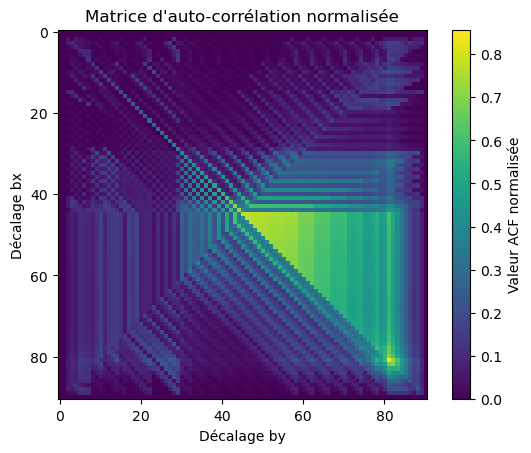

critere_valide_acf_matrix:  1
optimal_window:  [81 81]


In [12]:
No = 9
critere_valide_acf_matrix_V0, window_max_index_V0 =  ACF_matrix_V0(messages_hex_split,No)
print("critere_valide_acf_matrix: ",critere_valide_acf_matrix_V0)
print("optimal_window: ", window_max_index_V0)

Le résultat obtenu diffère significativement. On observe néanmoins que l'ordre de grandeur des valeurs est très proche de celui attendu, notamment la valeur maximale de l'ACF à environ 0.85, comme illustré sur la figure 6. De plus, l'octet qui donne la position de la fin du dernier sous-message du message a été détecté (b81). Cependant, le problème réside dans la démarche de l'article où la solution présumée est $b_x = 81$ et $b_y = 81$, position qui détient une autocorrélation supérieure à 99% de la valeur maximale. Pour rappel, on doit retrouver  $b_x = 33$ et $b_y = 81$.

Une autre approche a été tentée cette fois-ci, en ne considérant plus **les fenêtres glissantes**, ce qui va à l'encontre des indications de l'article. Cependant, cette  méthode permet d'obtenir des résultats plus précis.
Voici la nouvelle répartition des valeurs dans la matrice d'autocorrélation:  

<div>
    <img src="images\mat2.png" style="width:250px; height:100px;"/>
    <p>Figure 7: Répartition des valeurs d autocorrélation pour la fonction ACF_matrix_V0 où coor représente `np.correlate` </p>
</div>

In [13]:
from Func.PRE_fonctions import ACF_matrix
"""
    Calcule la matrice de la fonction d'autocorrélation (ACF) pour un message hexadécimal spécifique et génère une heatmap. Identifie les indices (bx, by) où l'ACF est supérieure à 99% et trouve la paire (bx, by) avec le produit maximal qui satisfait certains critères.

    Paramètres :
    - messages_hex_split (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux).
    - No (int) : Numéro du message pour lequel l'ACF doit être calculée.

    Retourne :
    - critere_valide_acf_matrix = 1 si le message est "long" 0 sinon 
    - window_max_index (List[int]) : Indices (bx, by) où l'ACF est supérieure à 99% et où la différence entre by et bx est maximal.

    Remarques :
    - La fonction affiche une heatmap de la matrice ACF.
    - Les critères de validité de l'ACF sont déterminés selon la longueur, la moyenne et la variance du message.

    Utilisation :
    ACF_matrix_V0(messages_hex, No)
"""

'\n    Calcule la matrice de la fonction d\'autocorrélation (ACF) pour un message hexadécimal spécifique et génère une heatmap. Identifie les indices (bx, by) où l\'ACF est supérieure à 99% et trouve la paire (bx, by) avec le produit maximal qui satisfait certains critères.\n\n    Paramètres :\n    - messages_hex_split (List[str]) : Liste de messages hexadécimaux (chaque message est représenté sous forme de chaîne de caractères hexadécimaux).\n    - No (int) : Numéro du message pour lequel l\'ACF doit être calculée.\n\n    Retourne :\n    - critere_valide_acf_matrix = 1 si le message est "long" 0 sinon \n    - window_max_index (List[int]) : Indices (bx, by) où l\'ACF est supérieure à 99% et où la différence entre by et bx est maximal.\n\n    Remarques :\n    - La fonction affiche une heatmap de la matrice ACF.\n    - Les critères de validité de l\'ACF sont déterminés selon la longueur, la moyenne et la variance du message.\n\n    Utilisation :\n    ACF_matrix_V0(messages_hex, No)\n'

critere_valide_acf_matrix:  1
optimal_window:  [29 29]


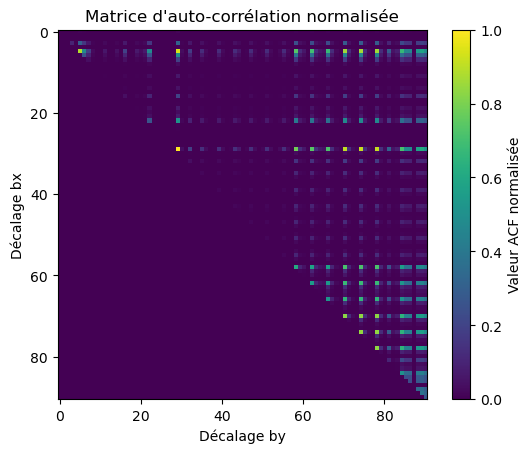

In [36]:
No = 9
critere_valide_acf_matrix, window_max_index =  ACF_matrix(messages_hex,No)
print("critere_valide_acf_matrix: ", critere_valide_acf_matrix)
print("optimal_window: ",window_max_index)

Dans cette nouvelle version, seule une valeur positionnée à l'emplacement $b_x = 29$ et $b_y = 29$ présente une autocorrélation supérieure à 99% de la valeur maximale. Une autre autocorrélation élevée est détectée à la position $b_x = 29$ et $b_y = 78$, cependant, cette corrélation n'atteint que les 90%. En réduisant le critère à 90%, la position optimale serait $b_x = 29$ et $b_y = 78$, se rapprochant ainsi davantage de la solution recherchée, $b_x = 33$et $b_y = 81$.

Après avoir exploré ces différentes approches, il semble difficile de reproduire fidèlement les résultats de l'article pour cette partie. Pour obtenir des valeurs proches de celles attendues, l'utilisation de la dernière approche semble la plus pertinente. En effet, l'aspect crucial ici est la détermination de la position du premier octet du premier sous-message du message, c'est-à-dire la position $b_x$. Nous retenons donc $b_x = 29$.

**Remarque :** L'accent a été mis ici principalement sur l'autocorrélation pour déterminer la position du premier sous-message des messages longs (ou étendus). Cependant, l'approche utilisant l'entropie permet de déterminer parfaitement la position du premier sous-message pour le message numéro 9 : first\_sub\_message\_position\_by\_entropie = 34 (soit $b_x$ = 33 en commençant par $b_0 $).

Par la suite, le programme utilisera uniquement la position du premier sous-message du message, donnée par l'entropie, car cela semble fournir de meilleurs résultats dans mon cas. Cette approche spécifique à la position du premier sous-message, basée sur l'entropie, sera utilisée pour la suite du processus SEIP.

## III.4 Extraction des Sous-messages

À partir de cette étape, déterminer la valeur idéale $k^*$ pour un message unique, comme défini précédemment dans la fonction \( \text{ACF}_k \), me permettra d'initialiser un modèle qui sera notre modèle initial. Soit $t = (b_1, b_2, b_3, \ldots, b_{k^*}) $, où $k^* $ est défini comme l'argument maximal $k $ pour lequel $ \text{ACF}_k$ de la séquence $t $ est supérieur à un seuil défini $ \theta_{\text{acf}}$. Ce seuil est défini à 2 ainsi un sous message sera forcément de taille supérieur où égale à 3 octets.



<div>
    <img src="images\acfarticle.png" style="width:500px; height:300px;"/>
    <p>Figure 8: ACF(k) pour les messages 2, 9, 16, 17 </p>
</div>

$\color{blue}{\text{Implémentation:}}$


In [15]:
from Func.PRE_fonctions import ACF
"""
    Calcule la fonction d'autocorrélation (ACF) pour un message hexadécimal spécifique,
    détecte le k optimal, et retourne le template correspondant.

    Paramètres :
    - B (List[str]) : Liste d'octets représentant le message hexadécimal.
    - acf_seuil (float) : Seuil pour la fonction d'autocorrélation (ACF).
    - first_sub_message_position (str) : Position du premier octet du sous-message.

    Retourne :
    - template (dict) : Dictionnaire contenant les informations sur le template,
      notamment le k optimal et le template hexadécimal.

    Remarques :
    - La fonction affiche également un graphique montrant la fonction d'autocorrélation avec les pics détectés.
    - Le paramètre 'B' doit être une liste d'octets hexadécimaux représentant le message complet.
    - Le seuil de l'ACF ('acf_seuil') est généralement fixé à 2, notamment pour les protocoles Modbus/TCP Read Multiple Registers.
    - Assurez-vous que 'first_sub_message_position' est la position correcte du premier octet du sous-message dans le message complet.

    Utilisation :
    ACF(B, acf_seuil, first_sub_message_position)
    """

"\n    Calcule la fonction d'autocorrélation (ACF) pour un message hexadécimal spécifique,\n    détecte le k optimal, et retourne le template correspondant.\n\n    Paramètres :\n    - B (List[str]) : Liste d'octets représentant le message hexadécimal.\n    - acf_seuil (float) : Seuil pour la fonction d'autocorrélation (ACF).\n    - first_sub_message_position (str) : Position du premier octet du sous-message.\n\n    Retourne :\n    - template (dict) : Dictionnaire contenant les informations sur le template,\n      notamment le k optimal et le template hexadécimal.\n\n    Remarques :\n    - La fonction affiche également un graphique montrant la fonction d'autocorrélation avec les pics détectés.\n    - Le paramètre 'B' doit être une liste d'octets hexadécimaux représentant le message complet.\n    - Le seuil de l'ACF ('acf_seuil') est généralement fixé à 2, notamment pour les protocoles Modbus/TCP Read Multiple Registers.\n    - Assurez-vous que 'first_sub_message_position' est la positio

message 9: ['03', '00', '00', '51', '02', 'f0', '80', '32', '07', '00', '00', '10', '00', '00', '0c', '00', '34', '00', '01', '12', '08', '12', '83', '02', '01', '00', '00', '00', '00', 'ff', '09', '00', '30', '00', '00', '22', '07', '00', '01', '22', '07', '00', '02', '22', '11', '00', '03', '22', '07', '00', '04', '22', '07', '00', '07', '22', '07', '00', 'c8', '22', '10', '02', 'bd', '22', '10', '0b', 'b8', '22', '07', '03', 'e8', '22', '07', '03', 'ea', '22', '07', '03', 'e9', '22', '07']

template {'k': 4, 'first_sub_message_index': 34, 'template_hex_t': ['00', '00', '22', '07'], 'template_dec_t': [0, 0, 34, 7]}


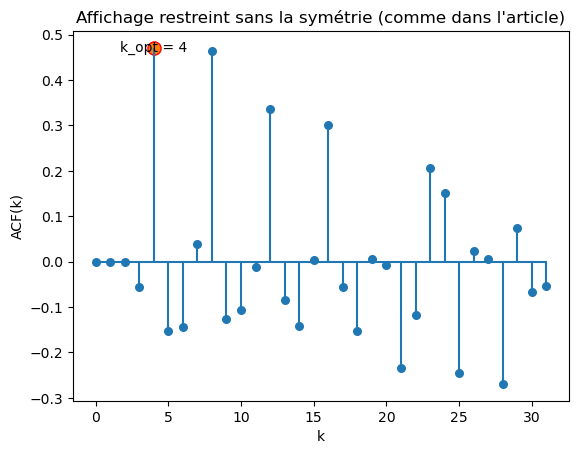

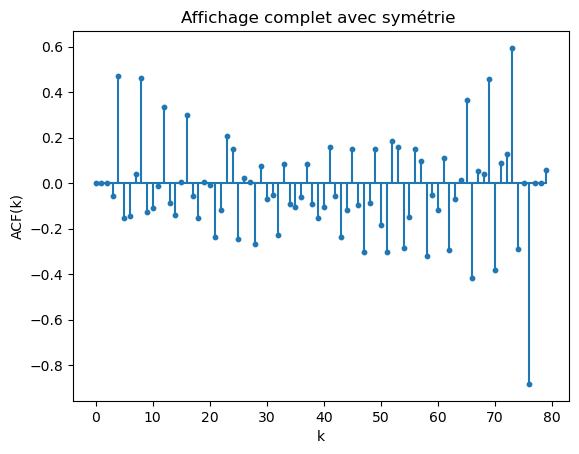

In [16]:
from matplotlib import pyplot as plt

No = 9 # Numéro du message Figure 3
B = messages_hex_split[No - 1]
acf_seuil = 2
first_sub_message_position = calculer_position_premier_sous_message(No, messages_hex_split, messages_hex)
plt.close()


template = ACF(B, acf_seuil, first_sub_message_position)
print('message ' + str(No) + ':', B)
print("\ntemplate", template)



Il est possible de changer le numéro du message dans la cellule précédente pour trouver le template associé. Pour les messages **m2, m9, m16 et m17**, les résultats obtenus pour le template sont les mêmes. Cependant, il est important de noter que les ordres de grandeur ne sont pas identiques. Étant donné que l'obtention de ces figures devrait normalement découler de l'application d'une formule mathématique, les erreurs potentielles sont supposées être faibles. Ainsi, l'article serait difficilement reproductible dans ce sens. Il est à noter ici que nous retrouvons la valeur de $ k $ idéal en respectant certaines conditions.

Pour $k $ égal à 0, l'autocorrélation vaut forcément 1 du fait que la corrélation est réalisée entre la séquence d'octets originale et la séquence d'octets non décalée, ce qui représente la même chose. On fixera donc $ \text{ACF}(k) = 0 $ pour les valeurs de toute corrélation dépassant ou égale à 1.

Par ailleurs, il a été omis de mentionner que la fonction d'autocorrélation est une fonction symétrique, expliquant ainsi pourquoi seule la moitié des données est considérée. Dans l'article, en figure 8, on restreindra donc le domaine par 2 afin de chercher où l'autocorrélation est maximale lorsque le décalage se fait de la gauche vers la droite. Les valeurs associées vont de $k = 0$ à $k = n/2$ où $n$ est le nombre d'octet du message)

Cette section **confirme ainsi la mise en oeuvre correcte de la fonction ACF (Autocorrelation Function)** comme illustré dans la figure 11.

## III.5 Inférence du Format des Sous-messages
La dernière étape du processus SEIP se consacre à l'inférence du format spécifique des sous-messages extraits.


## III.5.1 Segmentation basé sur le template
Afin de trouver la segmentation, c'est-à-dire, les segments correspondant aux sous-messages du message, on utilise l'algorithme de Needleman-Wunsch (NW). L'algorithme de Needleman-Wunsch est un algorithme de programmation dynamique classique pour l'alignement de séquences en paire. Il nécessite la définition préalable d'une matrice de pénalité $ P[b_i, b_j]$ et d'une pénalité de gap $p_g $, et met à jour une matrice de score $\text{NW}(b_i, b_j)$ entre les séquences en paire en utilisant l'équation suivante :
$$
\
\text{NW}(b_i, b_j) = 
\max
\begin{cases}
    \text{NW}(b_{i-1}, b_{j-1}) + P[b_i, b_j], \\
    \text{NW}(b_i, b_{j-1}) - p_g, \\
    \text{NW}(b_{i-1}, b_j) - p_g.
\end{cases}
\
$$


Pour mettre en œuvre cet algorithme, l'article détaille les étapes intermédiaires en se basant sur l'un des messages illustrés dans la figure 3, en l'occurrence, le message 2.
<div>
    <img src="images\dp.png" style="width:800px; height:200px;"/>
    <p>Figure 8: Etapes intermédiaire de l'algorithme de programmation dynamique sur le message m2 -  Extraction des sous messages du message m2 en utilisant le template initial avec $pg =-0.1$ et $ P[b_i, b_j] = -2*(|bi-bj|)/255 + 1 $</p>
</div>


$\color{blue}{\text{Implémentation:}}$


In [17]:
from Func.PRE_fonctions import Segmentation_show
"""
    Réalise la segmentation du message en sous-messages en utilisant l'algorithme Needleman-Wunsch.

    Paramètres :
    - B (list) : Liste représentant le message en hexadécimal.
    - template (dict) : Dictionnaire contenant les informations sur le template.
      - 'k' (int) : Taille du template.
      - 'first_sub_message_index' (int) : Position du premier sous-message dans le message complet.
      - 'template_hex_t' (list) : Liste hexadécimale représentant le template.
    - pg (float) : Pénalité pour l'insertion ou la suppression d'un gap.
    - penalty_matrix (str) : Matrice de pénalité à utiliser ('linear' ou 'dirac').

    Remarques :
    - Le paramètre 'B' doit être une liste d'octets hexadécimaux représentant le message complet.
    - Le paramètre 'template' doit être un dictionnaire contenant des informations valides sur le template.
    - Le paramètre 'pg' spécifie la pénalité pour l'insertion ou la suppression d'un gap.
    - Le paramètre 'penalty_matrix' doit être 'linear' ou 'dirac' pour spécifier la matrice de pénalité à utiliser.

    Exemples d'Utilisation :
    >>> B = ['0x01', '0x02', '0x03', '0x04', '0x05', '0x06']
    >>> template = {'k': 2, 'first_sub_message_index': 1, 'template_hex_t': ['0x01', '0x02']}
    >>> pg = 1.0
    >>> penalty_matrix = 'linear'
    >>> result = Segmentation(B, template, pg, penalty_matrix)

    Résultats Attendus :
    - S (dict) : Dictionnaire contenant la segmentation du message en sous-messages.
        - 'Segmentation_hex' (dict) : Sous-messages en format hexadécimal.
        - 'Segmentation_dec' (dict) : Sous-messages en format décimal.
    - NW_matrix_list (list) : Liste des matrices NW générées à chaque itération de l'algorithme.
    - DP_matrix (array) : Matrice DP résultante utilisée dans l'algorithme de Needleman-Wunsch.
    - M (array) : Matrice M utilisée pour l'inférence des sous-messages.
"""

"\n    Réalise la segmentation du message en sous-messages en utilisant l'algorithme Needleman-Wunsch.\n\n    Paramètres :\n    - B (list) : Liste représentant le message en hexadécimal.\n    - template (dict) : Dictionnaire contenant les informations sur le template.\n      - 'k' (int) : Taille du template.\n      - 'first_sub_message_index' (int) : Position du premier sous-message dans le message complet.\n      - 'template_hex_t' (list) : Liste hexadécimale représentant le template.\n    - pg (float) : Pénalité pour l'insertion ou la suppression d'un gap.\n    - penalty_matrix (str) : Matrice de pénalité à utiliser ('linear' ou 'dirac').\n\n    Remarques :\n    - Le paramètre 'B' doit être une liste d'octets hexadécimaux représentant le message complet.\n    - Le paramètre 'template' doit être un dictionnaire contenant des informations valides sur le template.\n    - Le paramètre 'pg' spécifie la pénalité pour l'insertion ou la suppression d'un gap.\n    - Le paramètre 'penalty_matr

In [18]:
from matplotlib import pyplot as plt

No = 2 # Numéro du message Figure 3
B = messages_hex_split[No - 1]
acf_seuil = 2
first_sub_message_position = calculer_position_premier_sous_message(No, messages_hex_split, messages_hex)
plt.close()
pg = -0.1
penalty_matrix = 'linear'


template = ACF(B, acf_seuil, first_sub_message_position)
plt.close()
plt.close()
NW_matrix_list,DP_matrix,M,S = Segmentation_show(B,template,pg,penalty_matrix)

In [19]:
print(NW_matrix_list)


[array([[-0. , -0.1, -0.2, -0.3, -0.4],
       [-0.1,  1. ,  0.9,  0.8,  0.7],
       [-0.2,  0.9,  2. ,  1.9,  1.8],
       [-0.3,  0.8,  1.9,  3. ,  2.9],
       [-0.4,  0.7,  1.8,  2.9,  4. ],
       [-0.5,  0.6,  1.7,  2.8,  3.9],
       [-0.6,  0.5,  1.6,  2.7,  3.8],
       [-0.7,  0.4,  1.5,  2.6,  3.7],
       [-0.8,  0.3,  1.4,  2.5,  3.6],
       [-0.9,  0.2,  1.3,  2.4,  3.5],
       [-1. ,  0.1,  1.2,  2.3,  3.4],
       [-1.1,  0. ,  1.1,  2.2,  3.3]]), array([[-0. , -0.1, -0.2, -0.3, -0.4],
       [-0.1, -0.2,  0.9,  0.8,  0.7],
       [-0.2, -0.3,  0.8,  1.9,  1.8],
       [-0.3, -0.4,  0.7,  1.8,  2.9],
       [-0.4,  0.7,  0.6,  1.7,  2.8],
       [-0.5,  0.6,  1.7,  1.6,  2.7],
       [-0.6,  0.5,  1.6,  2.7,  2.6],
       [-0.7,  0.4,  1.5,  2.6,  3.7],
       [-0.8,  0.3,  1.4,  2.5,  3.6],
       [-0.9,  0.2,  1.3,  2.4,  3.5],
       [-1. ,  0.1,  1.2,  2.3,  3.4]]), array([[-0. , -0.1, -0.2, -0.3, -0.4],
       [-0.1, -0.2,  0.9,  0.8,  0.7],
       [-0.2, -0.3, 

In [20]:
print(DP_matrix)

[[0.7 1.8 2.9 4.  3.9 3.8 3.7 3.6 3.5 3.4 3.3]
 [0.  0.7 1.8 2.9 2.8 2.7 2.6 3.7 3.6 3.5 3.4]
 [0.  0.  0.7 1.8 1.7 2.8 2.7 3.8 3.7 3.6 3.5]
 [0.  0.  0.  0.7 0.6 1.7 2.8 3.9 3.8 3.7 3.6]
 [0.  0.  0.  0.  0.7 1.8 2.9 4.  3.9 3.8 3.7]
 [0.  0.  0.  0.  0.  0.7 1.8 2.9 2.8 2.7 2.6]
 [0.  0.  0.  0.  0.  0.  0.7 1.8 1.7 2.8 2.7]
 [0.  0.  0.  0.  0.  0.  0.  0.7 0.6 1.7 2.7]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.7 1.8 2.8]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.7 1.7]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6]]


In [21]:
print(M)

[[ 0.7  1.8  2.9  4.   3.9  3.8  3.7  3.6  3.5  3.4  3.3]
 [ 0.   1.4  2.5  3.6  3.5  3.4  3.3  4.4  4.3  4.2  4.1]
 [ 0.   0.   2.5  3.6  3.5  4.6  4.5  5.6  5.5  5.4  5.3]
 [ 0.   0.   0.   3.6  3.5  4.6  5.7  6.8  6.7  6.6  6.5]
 [ 0.   0.   0.   0.   4.7  5.8  6.9  8.   7.9  7.8  7.7]
 [ 0.   0.   0.   0.   0.   5.4  6.5  7.6  7.5  7.4  7.3]
 [ 0.   0.   0.   0.   0.   0.   6.5  7.6  7.5  8.6  8.5]
 [ 0.   0.   0.   0.   0.   0.   0.   7.6  7.5  8.6  9.6]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   8.7  9.8 10.8]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   9.4 10.4]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.4]]


In [22]:
print(S)

{'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02', '0x02'], 's3': ['0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2, 2, 2], 's3': [192, 1, 10]}}


On retrouve exactement le même résultat que celui présenté dans la figure 7, ce qui confirme **la bonne implémentation de la fonction Segmentation** (Figure 11).

Dans le cas du message m2, la segmentation finale est trouvée directement à l'aide du template (ou modèle) initial. En effet, dans la figure 7, les sous-messages trouvés correspondent directement au sous-message que l'on peut observer dans la figure 3.

Dans d'autres cas, la segmentation donnée par le modèle initial peut ne pas donner la segmentation finale (Figure 9). Cela est principalement dû aux paramètres $pg$ (pénalité de gap) et à la matrice de pénalité qui jouent un grand rôle. Dans cette situation, il faudra itérer sur le template (ou le modèle) afin de relancer l'algorithme de programmation dynamique.

<div>
    <img src="images\dp2fail.png" style="width:350px; height:200px;"/>
    <p>Figure 9: Extraction des sous messages du message m2 en utilisant le template initial avec $pg = 0$ et $ P[b_i, b_j] = \delta(|bi-bj|) $</p>
</div>

$\color{blue}{\text{Implémentation:}}$


In [23]:
from matplotlib import pyplot as plt

No = 2 # Numéro du message Figure 3
B = messages_hex_split[No - 1]
acf_seuil = 2
first_sub_message_position = calculer_position_premier_sous_message(No, messages_hex_split, messages_hex)
plt.close()
pg = 0
penalty_matrix = 'dirac'


template = ACF(B, acf_seuil, first_sub_message_position)
plt.close()
plt.close()
NW_matrix_list,DP_matrix,M,S = Segmentation_show(B,template,pg,penalty_matrix)

In [24]:
print(M) 

[[1. 2. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [0. 2. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [0. 0. 3. 4. 4. 4. 4. 4. 4. 4. 4.]
 [0. 0. 0. 4. 4. 4. 5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 4. 5. 6. 6. 6. 6. 6.]
 [0. 0. 0. 0. 0. 5. 6. 6. 6. 6. 6.]
 [0. 0. 0. 0. 0. 0. 6. 7. 7. 7. 7.]
 [0. 0. 0. 0. 0. 0. 0. 7. 7. 7. 7.]
 [0. 0. 0. 0. 0. 0. 0. 0. 7. 7. 7.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 7. 7.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]]


In [25]:
print(S) 

{'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02'], 's3': ['0x02', '0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2, 2], 's3': [2, 192, 1, 10]}}


On trouve encore une fois le même résultat que dans la **figure 9**. Cependant, une petite subtilité subsiste. En effet, la recherche des sous-messages se fait en maximisant le score cumulé. Pour chaque colonne de la matrice M, on retient la première apparition de la valeur maximale. Afin de déterminer la segmentation, on commence par la dernière colonne et on finit à la première colonne. C'est normalement ainsi que l'on trouve la segmentation.

Si en suivant ce raisonnement, la segmentation du message M2 pour $pg = 0$ et $P[b_i, b_j] = \delta(|b_i-b_j|)$ devrait être:  

'Segmentation': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02'], 's3': ['0x02', '0xc0', '0x01', '0x0a']}   
et non  {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02'], 's3': ['0x02, 0x02', '0xc0', '0x01', '0x0a']} comme illustré à la figure 9. 

Ma conclusion est la suivante : soit il y a une information manquante, soit le type de segmentation réalisé dans ce cas-là importe peu du fait que la **matrice de pénalité** et la **pénalité de Gap** sont les plus rudimentaires possibles et provoquent des conflits quant au choix des octets définissant la segmentation. En effet, pour les deux segmentations précédentes, le score cumulé est le même. Les deux segmentations seraient donc possibles.

Ce problème apparaît lorsque dans une colonne donnée de la matrice M, on retrouve plusieurs fois la valeur maximale de la colonne. On voit ainsi l'importance de la **matrice de pénalité** et de la **pénalité de gap** qui permettent d'éviter cette duplication de valeur comme illustré en Figure 8.


## III.5.2 Mise à jour du le template


On se base sur la segmentation acquise lors de l'itération précédente afin de créer un nouveau template (ou modèle) en utilisant l'algorithme PMSA (Pattern Matching with Sequence Alignment). L'itération du modèle implique trois opérations cruciales appliquées à la segmentation obtenue précédemment : l'opération d'alignement, de Revert, et de merge.

1. **Opération d'Alignement :** Cette opération vise à ajuster les sous-messages dans la segmentation de manière à améliorer la concordance avec le modèle initial. Elle peut impliquer le déplacement, la suppression ou l'ajout de certains octets pour optimiser l'alignement.

2. **Opération de Revert :** L'opération de Revert permet de revenir en arrière dans le processus d'itération en annulant les modifications apportées à la segmentation. Cela peut être utile pour évaluer différentes configurations et choisir la meilleure.

3. **Opération de Merge :** L'opération de merge consiste à fusionner certains sous-messages adjacents dans la segmentation pour former des segments plus longs et plus significatifs. Cette opération peut être utilisée pour consolider des séquences d'octets connexes qui partagent des caractéristiques similaires.

En combinant ces opérations, l'algorithme PMSA ajuste itérativement le modèle, cherchant à améliorer la qualité de la segmentation à chaque étape. Ce processus itératif peut être répété jusqu'à ce que la segmentation obtenue converge vers une solution optimale selon les critères définis.

Pour appliquer correctement l'algorithme PMSA à la segmentation obtenue lors de l'itération précédente, illustrons cela à l'aide de l'exemple fourni dans la figure 9.

<div>
    <img src="images\iteration.png" style="width:500px; height:250px;"/>
    <p>Figure 10: Mise à jour du template (ou modèle) en se basant sur la segmentation obtenue à la figure 9. </p>
</div>

$\color{blue}{\text{Implémentation:}}$


On présente briévement la documentation des fonctions permettant de mettre à jour le template:


**nw_alignment(message1, message2, g_seuil, penalty_matrix, pg):**

    Effectue l'alignement de Needleman-Wunsch entre deux messages.

    Paramètres :
    - message1 (list) : Liste représentant le premier message.
    - message2 (list) : Liste représentant le deuxième message.
    - g_seuil (int) : Seuil pour le nombre de gaps autorisés.
    - penalty_matrix (str) : Matrice de pénalité à utiliser ('linear' ou 'dirac').
    - pg (float) : Pénalité pour l'insertion ou la suppression d'un gap.

    Retourne :
    - aligned_messages (list) : Liste contenant l'alignement des messages en décimal et en hexadécimal.

    Utilisation :
    nw_alignment(message1, message2, g_seuil, penalty_matrix, pg)
    """

**Revert_messages(reverted_segments,g_seuil,penalty_matrix,pg):**

    Rétablit les segments alignés après l'opération de revert.

    Paramètres :
    - reverted_segments (List[List[Union[str, int]]]) : Liste de segments résultant de l'opération de revert. On reprend les segments présent dans l'historique (qui ont été alignés par le passé, et on leur fait subir une nouvelle opération d'alignement  en prenant en compte un nouveau segment de la ségmentation).
      Chaque segment est une liste de valeurs décimales et hexadécimales alignées. 
    - g_seuil (int) : Seuil pour le retrait des colonnes excédant le nombre maximal de gaps autorisés.
    - penalty_matrix (str) : Type de matrice de pénalité à utiliser ('linear' ou 'dirac').
    - pg (int) : Pénalité pour l'ajout d'un gap lors de l'alignement.

    Retourne :
    - reverted_segments_aligned_dec_hex (List[List[Union[str, int]]]) : Segments alignés après l'opération de revert.
      La liste contient les segments avec les valeurs décimales et hexadécimales alignées.

    Remarques :
    - La fonction prend en compte le segment le plus long qui ne subira pas d'ajout ou de retrait de gaps.
    - Elle aligne les autres segments par rapport à ce segment de référence.
    - Les valeurs '-' sont utilisées pour représenter les gaps.
    - Les colonnes excédant le seuil de gaps autorisés sont retirées des segments alignés.
    
    Utilisation :
    Revert_messages(reverted_segments, g_seuil, penalty_matrix, pg)
    """    
    
        

**merge_messages(aligned_messages):**
    
    Fusionne des messages alignés en prenant la valeur maximale de chaque position.

    Paramètres :
    - aligned_messages (List[List[List[Union[str, int]]]]) : Liste de messages alignés.
      Chaque message aligné est une liste de listes représentant les valeurs décimales et hexadécimales.

    Retourne :
    - merged_messages (List[List[Union[str, int]]]) : Message fusionné résultant de la fusion des messages alignés.

    Remarques :
    - Les messages alignés doivent être fournis sous forme de liste de listes, où chaque liste représente les valeurs décimales et hexadécimales alignées.
    - La fonction fusionne les messages en prenant la valeur maximale de chaque position alignée.
    - Les valeurs '-' (gaps) sont ignorées lors de la fusion.
    - Le message fusionné est renvoyé sous forme de liste contenant les valeurs décimales et hexadécimales fusionnées.

    Utilisation :
    merge_messages(aligned_messages)

La fonction `TemplateUpdate` réalise une boucle sur les segments de la segmentation obtenue précédement. La première étape consiste à aligner les deux premiers segments, puis la deuxième étape est de fusionner les éléments alignés à l'étape précédente. Cependant, il est crucial de faire attention à l'historique des messages alignés. Lors de la première boucle, l’opération de fusion (merge) est directement effectuée. À la boucle suivante, lors de l'introduction d'un nouveau segment, il est nécessaire de prendre en compte l'alignement qui a été réalisé sur les deux premiers segments avant de fusionner. À chaque alignement, on veille à ce que le nombre de gaps à une position $b_x$ ne dépasse pas un certain seuil, défini par $\theta_g$.

In [26]:
from Func.PRE_fonctions import TemplateUpdate
"""
    Met à jour le template en itérant sur les segments alignés à l'aide de l'alignement de Needleman-Wunsch.

    Paramètres :
    - S (dict) : Dictionnaire contenant les segments alignés.
    - g_seuil (int) : Seuil pour le retrait des colonnes excédant le nombre maximal de gaps autorisés.
    - penalty_matrix (str) : Type de matrice de pénalité à utiliser ('linear' ou 'dirac').
    - pg (int) : Pénalité pour l'ajout d'un gap lors de l'alignement.
    - template_0 (dict) : Template initial avant l'itération.

    Retourne :
    - dict_template (dict) : Dictionnaire contenant les informations sur le template mis à jour.
      Les informations incluent le k optimal, la position du premier sous-message, le template hexadécimal et décimal.

    Remarques :
    - La fonction itère sur les paires de segments alignés à l'aide de l'alignement de Needleman-Wunsch.
    - Les colonnes excédant le seuil de gaps autorisés sont retirées des segments alignés.
    - La taille du template itéré ne peut pas être inférieure strictement à k.
    - Si S ne contient qu'un segment, le template reste inchangé, correspondant à la segmentation.

    Utilisation :
    TemplateUpdate(S, g_seuil, penalty_matrix, pg, template_0)
"""

"\n    Met à jour le template en itérant sur les segments alignés à l'aide de l'alignement de Needleman-Wunsch.\n\n    Paramètres :\n    - S (dict) : Dictionnaire contenant les segments alignés.\n    - g_seuil (int) : Seuil pour le retrait des colonnes excédant le nombre maximal de gaps autorisés.\n    - penalty_matrix (str) : Type de matrice de pénalité à utiliser ('linear' ou 'dirac').\n    - pg (int) : Pénalité pour l'ajout d'un gap lors de l'alignement.\n    - template_0 (dict) : Template initial avant l'itération.\n\n    Retourne :\n    - dict_template (dict) : Dictionnaire contenant les informations sur le template mis à jour.\n      Les informations incluent le k optimal, la position du premier sous-message, le template hexadécimal et décimal.\n\n    Remarques :\n    - La fonction itère sur les paires de segments alignés à l'aide de l'alignement de Needleman-Wunsch.\n    - Les colonnes excédant le seuil de gaps autorisés sont retirées des segments alignés.\n    - La taille du te

In [27]:
from matplotlib import pyplot as plt

No = 2 # Numéro du message Figure 3
B = messages_hex_split[No - 1]
acf_seuil = 2
first_sub_message_position = calculer_position_premier_sous_message(No, messages_hex_split, messages_hex)
plt.close()
pg = 0
penalty_matrix = 'dirac'
template = ACF(B, acf_seuil, first_sub_message_position)
plt.close()
plt.close()
print(template)

{'k': 4, 'first_sub_message_index': 12, 'template_hex_t': ['c1', '02', '02', '00'], 'template_dec_t': [193, 2, 2, 0]}


In [28]:
#On prend en entrée la ségmentation obtenue en figure 9 pour réaliser l'itération du modèle comme dans la figure 10.
S = {'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02'], 's3': ['0x02','0x02', '0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2], 's3': [2,2, 192, 1, 10]}}
g_seuil = 3/2
penalty_matrix = 'linear'
pg = -0.1 # valeur non précisé 
template_updated = TemplateUpdate(S, g_seuil, penalty_matrix, pg, template)
print(template_updated)

{'first_sub_message_index': 12, 'k': 4, 'template_hex_t': ['c2', '02', '02', '01'], 'template_dec_t': [194, 2, 2, 1]}


On retrouve bien NEW TEMPLATE = ['c2', '02', '02', '01'] comme illustré en figure 10.  

Dans le code, une vérification est effectuée pour s'assurer que la longueur du nouveau template ne soit pas inférieure à la longueur du template initial. Cette précaution est prise pour garantir que la longueur du template reste égale ou supérieure à la taille du premier sous-message, qui est définie par la variable k. Ainsi, il n'est pas autorisé d'avoir un template dont la longueur est strictement inférieure à k octets.  
Ceci valide la bonne impémentation de la fonction **TemplateUpdate** (Figure11). 






## III.6 Algorithme complet - SEIP   
  
  

<div>
    <img src="images\algo.png" style="width:500px; height:400px;"/>
    <p>Figure 11.1: Algorithme complet d'extraction de sous messages </p>
</div>

Les fonctions employées dans l'algorithme se trouvent dans le répertoire (module) "Func".


Illustration de l'application de l'algorithme sur le message numéro 2 :
<div>
    <img src="images\SEIPm2.png" style="width:1000px; height:400px;"/>
    <p>Figure 11.2: Méthode SEIP sur le message 2 </p>
</div>

# IV Résultats - Critère d'évaluation


## IV.1 Résultats pour les messages de l'article


On présente ci-dessous les segmentations finales pour tous les messages présents dans l'article. On rappelle que, nous nous baserons uniquement sur la position du premier sous-message d'un message déterminé par l'**entropie**, plutôt que par la matrice d'autocorrélation d'un message. En utilisant uniquement l'**entropie**, il est possible de rencontrer des erreurs, telles qu'une mauvaise coupure de l'entête du protocole pouvant occasionner un décalage dans la segmentation finale.  Cependant, il est important de noter que malgré ces erreurs, la coupure est réalisée de manière satisfaisante pour plus de la moitié des messages présents dans la figure 3. De plus, il est à noter que le critère d'évaluation prend en compte les éventuels décalages qui peuvent survenir dans les segmentations et ne les considère pas comme totalement erronés.

Il n'est pas pertinent ici de comparer la segmentation obtenue via l'algorithme avec la segmentation réelle en utilisant une matrice de pénalité et une pénalité de Gap fixe. En effet, ces paramètres ont un impact non négligeable sur le résultat final, il faut donc les faire varier pour trouver les bons qui permettront d'avoir de bons résultats pour les messages étudiés. **Le critère d'évaluation prend en compte cela.**

Par curiosité, en utilisant, $pg =-0.1$ et $ P[b_i, b_j] = -2*(|bi-bj|)/255 + 1$ , observons les résultats obtenus sur les segmentations des messages de la figure 3.
**Remarque: Ce test n'a pas été réalisé dans l'article**.

In [29]:
#----------------------Fonction utilisé pour extraction de sous messages (cf. Figure 11)----------------
from Func.PRE_fonctions import data_from_paper_txt_to_df
from  Func.PRE_fonctions import split_message
from Func.PRE_fonctions import calculer_position_premier_sous_message
from Func.PRE_fonctions import ACF
from Func.PRE_fonctions import ACF_matrix
from Func.PRE_fonctions import Segmentation
from Func.PRE_fonctions import TemplateUpdate


In [30]:
#----------------------------------------------------------------------------------------------------------------------------
#----------------------Code extrait du fichier Sub_messages_extraction_algorithm_boucle.py----------------------------------------
#----------------------------------------------------------------------------------------------------------------------------

# =============================================================================
# Blbiliothèques
# =============================================================================
import copy
from matplotlib import pyplot as plt

# =============================================================================
# Chargement des données de l'article depuis un fichier texte
# =============================================================================
filename = 'Data_found\\data_paper_PRE_image_reformed.txt'
df = data_from_paper_txt_to_df(filename)

# =============================================================================
# Extraction des messages des communications
# =============================================================================
messages_hex, messages_hex_split = split_message(df)

# =============================================================================
# Paramètres du programme
# =============================================================================
acf_seuil = 2  # Un sous-message a au minimum une longueur de deux octets
penalty_matrix = 'linear'
# penalty_matrix = 'dirac'
pg = -0.1  # Pénalité pour les gaps
g_seuil = 2  # Pas plus de 2 gaps alignés pour 3 segments
l_max = 100  # Nombre maximal d'itérations
t_seuil = 1  # Seuil de différence entre le dernier template et le précédent

# =============================================================================
# Boucle sur les messages No=1....17
# =============================================================================
Segmentation_all_messages =['Nan'] #On récupère les segmentations finales dans cette variable pour tous les messages

number_of_messages= len(messages_hex_split)
for No in range(1,number_of_messages+1):

    # -----------------------------------
    message_hex = messages_hex[No - 1]
    B = messages_hex_split[No - 1]
    #print("\nÉtude sur le message numéro:", No)

    # =============================================================================
    # Détermination de la position du premier sous-message en utilisant l'entropie uniquement
    # =============================================================================

    critere_valide, first_sub_message_position_by_ACF_Matrix = ACF_matrix(messages_hex,No)
    first_sub_message_position_by_entropie = calculer_position_premier_sous_message(No, messages_hex_split, messages_hex)
    first_sub_message_position = first_sub_message_position_by_entropie
    plt.close()
    plt.close()

#     print(
#         f"\nPosition du premier sous-message: {first_sub_message_position} - existe ssi il est supérieur à acf_seuil:{acf_seuil} "
#     )


    # =============================================================================
    # Détermination de la position du premier sous-message en utilisant l'entropie et l'ACF matrix pour les message long 
    # =============================================================================

    #2-------Position du premier sous message s'il existe (Cut the protocol header operation)
    #--------Deux méthodes existe pour trouver la position du premier sous message 

    # if critere_valide == 1 and int(first_sub_message_position_by_entropie)!=1:  #Rappel: first_sub_message_position_by_entropie = 1 est la valeur par défaut signifiant qu'il n'y a pas de sous message dans le message
    #2.1-----Méthode 1: ACF_matrix - si le message est "long" ( --> satisfaction de deux critères, si les critères sont vérifiés critere_valide = 1)
    #     first_sub_message_position = str(min(first_sub_message_position_by_ACF_Matrix))
    # #2.2-----Méthode 2: Entropie - si le message est n'est pas "long", on utlise en l'entropie pour trouver la position du premier sous message ( -->  message_mi.critere_valide = 0)
    # else:   
    #     first_sub_message_position = first_sub_message_position_by_entropie



    # =============================================================================
    # Initialisation du template
    # =============================================================================
    if int(first_sub_message_position) > 1:  # Rappel : si position_premier_sous_message <= 1, le message n'a pas de sous-message
        template = ACF(B, acf_seuil, first_sub_message_position)
        #print("\ntemplate", template)
        plt.close()
        plt.close()



        # =============================================================================
        # Boucle permettant de mettre à jour le template dans le but de trouver la meilleure segmentation S
        # =============================================================================
        l = 0
        dt = t_seuil * 100  # Valeur initiale > t_seuil random (100 correspond à 0x64)

        template_0 = copy.deepcopy(template)  # Copie profonde du template initial

        # Stockage des segmentations et des templates au fur et à mesure des itérations
        S_list = []
        template_list = [template_0]

        while dt > t_seuil and l_max > l:

            # =============================================================================
            # Segmentation du message en utilisant le template actuel
            # =============================================================================
            S = Segmentation(B, template, pg, penalty_matrix)
            S_list.append(S)

            # =============================================================================
            # Mise à jour du template en utilisant la segmentation actuelle
            # =============================================================================
            template = TemplateUpdate(S, g_seuil, penalty_matrix, pg, template_0)
            template_list.append(template)

            # =============================================================================
            # Calcul de la différence entre le template actuel et le précédent
            # =============================================================================
            dt_list = [
                t1 - t2 for t1, t2 in zip(template_list[-1]["template_dec_t"], template_list[-2]["template_dec_t"])
            ]
            dt = sum(dt_list)

            l += 1  # Itération

        #print("\nSegmentation finale:", S)
    else:
        template = {}
        S = {}
    
    
    #Récupération de la ségmentation pour le message No
    Segmentation_all_messages.append(S)


L'octet donnant l'indication sur longueur du message est l'octet numéro: 4

 !----Le message ne contient pas de sous messages----!
L'octet donnant l'indication sur longueur du message est l'octet numéro: 4

 !----Le message ne contient pas de sous messages----!
L'octet donnant l'indication sur longueur du message est l'octet numéro: 4

 !----Le message ne contient pas de sous messages----!
L'octet donnant l'indication sur longueur du message est l'octet numéro: 4

 !----Le message ne contient pas de sous messages----!
L'octet donnant l'indication sur longueur du message est l'octet numéro: 4

 !----Le message ne contient pas de sous messages----!


In [31]:
print("--------------------En utilisant, pg =-0.1 et P[b_i, b_j] = -2*(|bi-bj|)/255 + 1----------------------\n")
for No in range(1,number_of_messages+1):
    print("Ségmentation pour le message m"+ str(No)+":", Segmentation_all_messages[No],"\n")

--------------------En utilisant, pg =-0.1 et P[b_i, b_j] = -2*(|bi-bj|)/255 + 1----------------------

Ségmentation pour le message m1: {'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02', '0x02'], 's3': ['0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2, 2, 2], 's3': [192, 1, 10]}} 

Ségmentation pour le message m2: {'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02', '0x02'], 's3': ['0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2, 2, 2], 's3': [192, 1, 10]}} 

Ségmentation pour le message m3: {} 

Ségmentation pour le message m4: {} 

Ségmentation pour le message m5: {} 

Ségmentation pour le message m6: {'Segmentation_hex': {'s1': ['0x04', '0x11', '0x43', '0x02', '0x00', '0xff', '0x09', '0x00', '0x02', '0x30', '0x38']}, 'Segmentation_dec': {'s1': [4, 17, 67, 2, 0, 255, 9, 0, 2, 48, 56]}} 

Ségmentation pour le message m7: {'Segmentation

Pour les paramètres définis, voici les résultats obtenus :

- Pour les messages **m1, m2, m3, m4, m5 et m10**, une structure de sous-messages est identifiée, et la segmentation souhaitée est récupérée avec précision grâce à l'algorithme.

- Parmi les messages sans structure de sous-messages, on compte **m3, m4, m5, m6, m7, m12 et m13**. L'algorithme échoue pour les messages **m6 et m7**. Bien qu'une segmentation soit détectée, le résultat ne comporte qu'un seul segment. Il est supposé que l'erreur provient probablement d'une mauvaise détermination de la position du premier sous-message par la fonction **calculer_position_premier_sous_message**. Cette fonction ne convient pas parfaitement à tous les messages "longs", comme mentionné précédemment.

- Pour le message **m8**, deux segments sont récupérés au lieu d'un. Cependant, le deuxième segment obtenu correspond exactement à celui attendu.

- Pour le message **m9**, 6 segments sur 14 sont récupérés de manière satisfaisante. Les 8 autres sont soit erronés, soit décalés d'un ou plusieurs octets.

- Pour **m11, m15, m16 et m17**, la segmentation obtenue est en partie erronée ou décalée d'un ou plusieurs octets.

- Pour **m14**, un décalage d'un octet est observé dans la segmentation finale. Cela est probablement dû à une mauvaise détermination de la position du premier sous-message du message. Cependant, ce décalage n'invalidarait pas la segmentation selon les critères d'évaluation de l'article.

On constate que l'article met en avant des résultats positifs en utilisant des messages qui produisent des résultats corrects avec l'algorithme, mais il ne met pas autant l'accent sur les erreurs observées pour d'autres messages avec les paramètres spécifiés.






## IV.2 Implémentation du critère d'évaluation




Un critère d'évaluation, SAMS (Sub-message Alignment Matching Score) a été élaboré pour évaluer la proximité entre la segmentation obtenue par l'algorithme et la segmentation réelle. Ce critère prend en compte d'éventuels décalages, ne les considérant pas comme des erreurs complètes dans l'obtention de la segmentation. Pour tester ce critère, nous l'appliquerons uniquement aux messages présentés dans l'article. Cependant, il est également envisageable de l'appliquer à l'ensemble des messages disponibles de manière open source. Cela nécessiterait toutefois **un travail supplémentaire, car la fonction créée pour extraire les messages à partir des fichiers .PCAP ne récupère pas les segmentations réelles. Il serait donc nécessaire d'extraire ces segmentations en se basant sur la méthodologie expliquée en Figure 2.**

<div>
    <img src="images\critereEval2.png" style="width:300px; height:200px;"/>
    <p>Figure 12: Critère d'évaluation (1) </p>
</div>
<div>
    <img src="images\critereEval.png" style="width:300px; height:200px;"/>
    <p>Figure 13: Critère d'évaluation (2) </p>
</div>


D'après les équations exposées précédemment, la valeur de **w** est intrinsèquement unique pour un message spécifique. Toutefois, dans la réalité (cf. page 7 de l'article), l'utilisateur a la liberté de sélectionner la valeur de **w**, tant qu'elle reste à l'intérieur des bornes inférieure et supérieure prédéfinies, telles qu'illustrées à la figure 12. Lors de l'application du critère, **w** demeure un paramètre d'entrée. Cependant, l'utilisateur détient la possibilité d'obtenir les seuils inférieur et supérieur de **w**, ainsi que de la valeur optimale de **w**, comme détaillé à la figure 12.

Afin d'appliquer le critère, nous devons disposer des segmentations réelles, que nous relevons manuellement. On appliquera le critère seulement sur **les messages m1, m7, m8, m9,m11**. Ainsi, on aura une idée de la valeur du critère dans les cas briévement décrit en fin de partie IV.1.  


 
On créer donc le dictionnaire si dessous avec les segmentations réelles des messages m1, m7, m8, m9,m11:

In [32]:
Segmentation_real = [
    'Nan', 
    #1
    {'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02', '0x02'], 's3': ['0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2, 2, 2], 's3': [192, 1, 10]}}, 
     'Nan',   'Nan', 'Nan',  'Nan',      'Nan',    
    #7
    {},  
    #8
    {'Segmentation_hex': {'s1': ['0x00', '0x01', '0x22', '0x03']}, 'Segmentation_dec': {'s1': [0, 1, 34, 3]}},  
     #9  
    {'Segmentation_hex': {'s1': ['0x00', '0x00', '0x22', '0x07'], 's2': ['0x00', '0x01','0x22', '0x07'],  's3': ['0x00','0x02', '0x22','0x11'],  's4': ['0x00', '0x03','0x22','0x07'], 's5': ['0x00','0x04','0x22','0x07'], 's6': ['0x00','0x07','0x22','0x07'], 's7': ['0x00','0xc8','0x22','0x10'], 's8': ['0x02','0xbd','0x22','0x10'], 's9': ['0x0b','0xb8','0x22','0x07'], 's10': ['0x03','0xe8','0x22','0x07'], 's11': ['0x03','0xea','0x22','0x07'], 's12': ['0x03','0xe9','0x22','0x07']}, 
     'Segmentation_dec': {'s1': [0, 0, 34, 7], 's2': [0, 1, 34, 7], 's3': [0, 2, 34, 17], 's4': [0, 3, 34, 7], 's5': [0, 4, 34, 7], 's6': [0, 7, 34, 7], 's7': [0, 200, 34, 16], 's8': [2, 189, 34, 16], 's9': [11, 184, 34, 7], 's10': [3, 232, 34, 7], 's11': [3, 234, 34, 7], 's12': [3, 233, 34, 7]}}, 
    'Nan', 
    #11
    {'Segmentation_hex': {'s1': ['0x01', '0x09', '0xc1', '0x02', '0x01', '0x00', '0xc2'], 's2': ['0x02', '0x01', '0x02']}, 'Segmentation_dec': {'s1': [1, 9, 193, 2, 1, 0, 194], 's2': [2, 1, 2]}}, 
    'Nan', 'Nan',    'Nan', 'Nan',   'Nan', 'Nan', 
    ]

$\color{blue}{\text{Implémentation:}}$


In [33]:
from Func.PRE_fonctions import data_from_paper_txt_to_df
from Func.PRE_fonctions import split_message
from Func.PRE_fonctions import SAMS_criteria
"""
    Calcule le critère SAMS (Sub-message Alignment Matching Score) pour évaluer la correspondance entre
    la segmentation réelle et la segmentation trouvée pour un message donné.

    Paramètres :
    - Segmentation_real : Dictionnaire contenant les segmentations réelles des messages.
    - Segmentation_all_messages : Dictionnaire contenant toutes les segmentations trouvées pour tous les messages par "SEIP Process".
    - messages_hex_split : Liste des messages en hexadécimal.
    - No : Numéro du message à évaluer.
    - w : Paramètre pour ajuster le score en fonction de l'alignement des sous-messages.

    Retourne :
    - res : Score final du critère SAMS.
    - w_borne_inf_sup : Borne inférieure et supérieure pour le paramètre w.
    - w_opt : Valeur optimale de w qui minimise le score du critère.

    Remarque :
    - Les segmentations sont représentées en hexadécimal.
    - Le résultat final (res) est basé sur le match_gain, l'Offset_penalty et la segmentation_penaly.
"""



'\n    Calcule le critère SAMS (Sub-message Alignment Matching Score) pour évaluer la correspondance entre\n    la segmentation réelle et la segmentation trouvée pour un message donné.\n\n    Paramètres :\n    - Segmentation_real : Dictionnaire contenant les segmentations réelles des messages.\n    - Segmentation_all_messages : Dictionnaire contenant toutes les segmentations trouvées pour tous les messages par "SEIP Process".\n    - messages_hex_split : Liste des messages en hexadécimal.\n    - No : Numéro du message à évaluer.\n    - w : Paramètre pour ajuster le score en fonction de l\'alignement des sous-messages.\n\n    Retourne :\n    - res : Score final du critère SAMS.\n    - w_borne_inf_sup : Borne inférieure et supérieure pour le paramètre w.\n    - w_opt : Valeur optimale de w qui minimise le score du critère.\n\n    Remarque :\n    - Les segmentations sont représentées en hexadécimal.\n    - Le résultat final (res) est basé sur le match_gain, l\'Offset_penalty et la segmenta

In [34]:
filename = 'Data_found\\data_paper_PRE_image_reformed.txt'
df = data_from_paper_txt_to_df(filename)
messages_hex, messages_hex_split = split_message(df)
#Récupération des segmentations de tous les messages de l'article donnée dans une des cellule précédente
Segmentation_all_messages = ['Nan', {'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02', '0x02'], 's3': ['0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2, 2, 2], 's3': [192, 1, 10]}}, {'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x02', '0x00'], 's2': ['0xc2', '0x02', '0x02', '0x02'], 's3': ['0xc0', '0x01', '0x0a']}, 'Segmentation_dec': {'s1': [193, 2, 2, 0], 's2': [194, 2, 2, 2], 's3': [192, 1, 10]}}, {}, {}, {}, {'Segmentation_hex': {'s1': ['0x04', '0x11', '0x43', '0x02', '0x00', '0xff', '0x09', '0x00', '0x02', '0x30', '0x38']}, 'Segmentation_dec': {'s1': [4, 17, 67, 2, 0, 255, 9, 0, 2, 48, 56]}}, {'Segmentation_hex': {'s1': ['0x04', '0x11', '0x43', '0x02', '0x00', '0xff', '0x09', '0x00', '0x02', '0x30', '0x42']}, 'Segmentation_dec': {'s1': [4, 17, 67, 2, 0, 255, 9, 0, 2, 48, 66]}}, {'Segmentation_hex': {'s1': ['0x00', '0x00', '0x00', '0xff', '0x09', '0x00', '0x04'], 's2': ['0x00', '0x01', '0x22', '0x03']}, 'Segmentation_dec': {'s1': [0, 0, 0, 255, 9, 0, 4], 's2': [0, 1, 34, 3]}}, {'Segmentation_hex': {'s1': ['0x00', '0x00', '0x22', '0x07'], 's2': ['0x00', '0x01'], 's3': ['0x22', '0x07'], 's4': ['0x02', '0x22'], 's5': ['0x11', '0x00'], 's6': ['0x22', '0x07'], 's7': ['0x04', '0x22'], 's8': ['0x22', '0x07'], 's9': ['0xc8', '0x22', '0x10'], 's10': ['0x02', '0xbd', '0x22', '0x10'], 's11': ['0x0b', '0xb8', '0x22', '0x07'], 's12': ['0x03', '0xe8', '0x22', '0x07'], 's13': ['0x03', '0xea', '0x22', '0x07'], 's14': ['0x03', '0xe9', '0x22', '0x07']}, 'Segmentation_dec': {'s1': [0, 0, 34, 7], 's2': [0, 1], 's3': [34, 7], 's4': [2, 34], 's5': [17, 0], 's6': [34, 7], 's7': [4, 34], 's8': [34, 7], 's9': [200, 34, 16], 's10': [2, 189, 34, 16], 's11': [11, 184, 34, 7], 's12': [3, 232, 34, 7], 's13': [3, 234, 34, 7], 's14': [3, 233, 34, 7]}}, {'Segmentation_hex': {'s1': ['0xc1', '0x02', '0x01', '0x00'], 's2': ['0xc2', '0x02', '0x01', '0x02'], 's3': ['0xc0', '0x01', '0x09']}, 'Segmentation_dec': {'s1': [193, 2, 1, 0], 's2': [194, 2, 1, 2], 's3': [192, 1, 9]}}, {'Segmentation_hex': {'s1': ['0x01', '0x09', '0xc1', '0x02', '0x01', '0x00', '0xc2'], 's2': ['0x02', '0x01', '0x02']}, 'Segmentation_dec': {'s1': [1, 9, 193, 2, 1, 0, 194], 's2': [2, 1, 2]}}, {}, {}, {'Segmentation_hex': {'s1': ['0x01', '0x00', '0x0e', '0x00', '0x00', '0x04', '0x01', '0x12', '0x0a', '0x10', '0x02', '0x00', '0x10', '0x00', '0x00', '0x83', '0x00', '0x00', '0x00']}, 'Segmentation_dec': {'s1': [1, 0, 14, 0, 0, 4, 1, 18, 10, 16, 2, 0, 16, 0, 0, 131, 0, 0, 0]}}, {'Segmentation_hex': {'s1': ['0x01', '0x00', '0x02', '0x00'], 's2': ['0x14', '0x00'], 's3': ['0x00', '0x04'], 's4': ['0x01', '0xff'], 's5': ['0x04', '0x00', '0x80', '0xa9'], 's6': ['0x10', '0x00'], 's7': ['0x00', '0x00'], 's8': ['0x00', '0x00']}, 'Segmentation_dec': {'s1': [1, 0, 2, 0], 's2': [20, 0], 's3': [0, 4], 's4': [1, 255], 's5': [4, 0, 128, 169], 's6': [16, 0], 's7': [0, 0], 's8': [0, 0]}}, {'Segmentation_hex': {'s1': ['0x00', '0xf2', '0x00', '0x8b', '0x83', '0x00', '0xf2', '0x81', '0x12', '0x0a', '0x10', '0x09'], 's2': ['0x00', '0xce', '0x00', '0x4a', '0x81', '0x00', '0x45', '0x58', '0x12', '0x0a', '0x10', '0x1c'], 's3': ['0x39', '0x00', '0x2a', '0x83'], 's4': ['0x00', '0x1a', '0x38']}, 'Segmentation_dec': {'s1': [0, 242, 0, 139, 131, 0, 242, 129, 18, 10, 16, 9], 's2': [0, 206, 0, 74, 129, 0, 69, 88, 18, 10, 16, 28], 's3': [57, 0, 42, 131], 's4': [0, 26, 56]}}, {'Segmentation_hex': {'s1': ['0x00', '0x08', '0x6a', '0x35', '0x64', '0x57', '0x76', '0x53', '0x79', '0x54', '0xff', '0x09'], 's2': ['0x00', '0x02', '0x75', '0x69', '0xff', '0x09', '0x00'], 's3': ['0x06', '0x59', '0x59', '0x79', '0x45', '0x6c', '0x4a']}, 'Segmentation_dec': {'s1': [0, 8, 106, 53, 100, 87, 118, 83, 121, 84, 255, 9], 's2': [0, 2, 117, 105, 255, 9, 0], 's3': [6, 89, 89, 121, 69, 108, 74]}}]

#Choix parmi m1, m7, m8, m9,m11
No = 11
w=0
res,w_borne_inf_sup,w_opt = SAMS_criteria(Segmentation_real,Segmentation_all_messages,messages_hex_split,No,w)



In [35]:
print(f"Pour le message {No}, SAMS: {res} avec w = {w}, w_opt = {w_opt}, w_borne_inf_sup = {w_borne_inf_sup}")

Pour le message 11, SAMS: 1 avec w = 0, w_opt = -2.5, w_borne_inf_sup = 2.5


On  relève la valeur du critère SAMS:
 - Pour m1: SAMS: 1 (w=0,No = 1)     --> Le résultat à été correctement trouvée (--> SAMS: 1)
 - Pour m7: SAMS: -0.0 (w=0,No = 7)  --> Une segmentation à été trouvée alors qu'il n'y en a pas réellement (-->SAMS: 0)
 - Pour m8: SAMS: 0 (w=0,No = 8) --> Un segment en plus du nombre de segment réelle à été trouvée (--> SAMS: 0)
 - Pour m9: SAMS: SAMS: 0.017579019801509648 (w=0,No = 9) --> très peu de segments trouvée et d'autres sont décalé de plusieurs octet (--> SAMS: 0.017)
 - Pour m11: SAMS: 1 --> segments décalés (w=0,No = 11) -->   (--> SAMS: 1)


Comme mentionné dans l'article, le critère prend en considération les éventuels décalages de position des octets, qui peuvent résulter d'une mauvaise coupure de l'en-tête du protocole, comme illustré avec le message **m11 (SAMS : 1)**. Les valeurs obtenues pour le critère sont cohérentes et se rapprochent de celles fournies par l'article, bien qu'elles ne soient pas identiques. Cette divergence s'explique par le fait que le critère est appliqué à des ensembles de messages, chaque ensemble étant déterminé par la même commande. On rappelle que les commandes spécifiques pour le protocole de communication S7 incluent **Job - Ack - Req - Rsp**.

# V Réecriture du code

Comme indiqué au début du notebook, l'ensemble du programme a été réécrit en utilisant la **programmation orientée objet**. Le fichier **"Script_PRE_class.py"** a été créé dans le but de faciliter la mise à jour des paramètres grâce à la modification d'attributs, rendant ainsi le code plus lisible. De plus, certaines méthodes de classe sont spécifiquement conçues pour l'affichage de figures, ce qui contribue à **séparer l'affichage du calcul de certains paramètres de l'algorithme**, rendant ainsi le code plus léger.  
À travers les cinq parties précédentes, le processus SEIP de l'article a été expliqué pour un message donné. Pour appliquer ce processus à tous les messages disponibles, il suffit de réaliser une boucle sur l'ensemble des messages. Cette boucle sur tous les messages est mise en oeuvre dans le fichier **"Script_PRE_class.py"**. 

Avant le début du code, on donne un exemple d'utilisation de toutes les méthodes de classe utilisées dans le script. Vous pouvez vous référer à ces exemples pour comprendre comment appliquer le processus SEIP sur un message donné. Si vous souhaitez utiliser l'algorithme sur seulement un message ou deux messages, je vous conseille d'utiliser le fichier **Sub_messages_extraction_algorithm.py**.

 

----------------------------------------------Début du code dans le fichier:  "Script_PRE_class.py" ---------------------------------  
#0.1-----Récupération de tous les messages

#filename_data_paper = 'Data_found\\data_paper_PRE_image_reformed.txt'
#filename_data_open_source = 'Data_found\\df_packets_2_repositories_300000_messages.csv' #300000 messages le calcul est très très loS7
#filename_data_open_source = 'Data_found\\df_packets_2_repositories_50_messages.csv'
#data_type = 'data_open_source'
#data_type = 'data_from_paper'

Au début du programme, vous avez le choix entre deux ensembles de données : les 300 000 messages récupérés de manière open source de (uniquement communication S7) ou les données utilisées dans l'article. Vous pouvez effectuer ce choix en définissant la valeur de la variable `data_type`. Cette variable permet de spécifier quel ensemble de données sera utilisé dans le processus SEIP. En modifiant la valeur de `data_type`, vous pouvez sélectionner les données que vous souhaitez traiter dans le programme.

La variable `Segmentation_all_messages` récupère les segmentations finales de tous les messages.

# VI Conclusion


La méthode présentée dans l'article représente l'un des premiers essais pour effectuer de l'ingénierie inverse sur les protocoles de communication associés à l'industrie. Il existe néanmoins plusieurs aspects à améliorer pour rendre les différentes opérations plus précises. Cependant, les résultats restent satisfaisants pour les messages qui respectent les hypothèses de cette méthode, c'est-à-dire les messages non chiffrés et non compressés.

**L'article demeure assez flou en ce qui concerne la détermination de la position du premier octet du premier sous-message d'un message. Pour pallier ce manque de clarté, j'ai formulé des hypothèses qui semblaient pertinentes afin d'obtenir des résultats similaires. Une attention particulière aurait dû être portée à cette partie, car elle joue un rôle crucial dans l'efficacité de la méthode.**

En revanche, l'implémentation des algorithmes de programmation dynamique (NW) et de PMSA est bien détaillée dans l'article, expliquant de manière approfondie la réalisation des étapes sur un message, ce qui facilite la reproductibilité.